#Bienvenidos al taller:
# Aprendizaje supervisado

# II-Mini Workshop on High Performance Computing in Science and Engineering







Instituto de Ciencias Físicas

Agosto 2023.


Oscar Roberto Chaparro Amaro

David Pérez Martínez

## Introducción a los ejercicios de aprendizaje supervisado

Instalaremos los paquetes que se usarán en los ejercicios, comenzando con el entorno conda en colab:

In [1]:
!pip install -q condacolab

In [2]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


Se instala ahora un paquete de traducción:

In [1]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=f324b56ff8cfb2441bd63e89ab8d0d146f5704392f2a6faf3be7cc83d092674c
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
 

In [2]:
import sys
print(sys.executable)
!conda --version

/usr/bin/python3.real
conda 23.1.0


Instalaremos vía conda root-cern

In [3]:
!conda install -c conda-forge root

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

Se importan entonces las librerias a usar en este taller:

In [4]:
!python3 --version
import pandas as pd
import array,csv, os, time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from graphviz import Source
from IPython.display import SVG
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score , confusion_matrix, auc
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn import tree
import googletrans
from googletrans import Translator
from sklearn.tree import plot_tree
import ROOT
from ROOT import kBlack, kGray, kBlue, kRed,kGreen,kCyan,kViolet,kOrange,kCyan
from ROOT import TLegend,TH1F,TH2F, TCanvas,TPaveStats,TGraph, TMultiGraph

Python 3.10.10
Welcome to JupyROOT 6.28/00


Importaremos los datos para los ejercicios desde el repositorio del taller:

In [5]:
!git clone https://github.com/ChJazhiel/HPC_II.git

Cloning into 'HPC_II'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 40 (delta 17), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (40/40), 3.85 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (17/17), done.


## Ejercicio 1. Clasificación de enfermedades en función de los síntomas

Usaremos un banco de datos de enfermedades con distintos archvios .csv dispoinlbe en:

https://www.kaggle.com/code/naga26/disease-type-prediction-using-symptoms/notebook

El primer archivo consiste en una valoración de severidad de una serie de síntomas, y dado el grado y combinación de cada uno de estos sítomas, puede indicar un tipo de enfermdad, como infección por hongos, enfermedad por reflujo gastroesofágico (GERD, por sus siglas en inglés), entre otras:

In [6]:
df = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/dataset.csv')
df.head()

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

Podemos obtener información sobre este conjunto de datos:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [8]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

Verifiquemos si exiten valores nulos, en nuestro caso la variable "Disease" o enfermedad, es nuestra variable objetivo (reconstrucción supervisada).

In [9]:
df['Disease'].isnull().values.any()

False

In [10]:
df['Symptom_5'].isnull().values.any()

True

Para asegurar que el archivo no contenga espacios en blanco podemos aplicar la siguiente transformación:

In [11]:
data = df[df.columns].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

Disease  Symptom_1             Symptom_2             Symptom_3  \
0  Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1  Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2  Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3  Fungal infection    itching             skin_rash   dischromic _patches   
4  Fungal infection    itching             skin_rash  nodal_skin_eruptions   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                  NaN       NaN       NaN       NaN       NaN       NaN   
2                  NaN       NaN       NaN       NaN       NaN       NaN   
3                  NaN       NaN       NaN       NaN       NaN       NaN   
4                  NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [12]:
df = df.fillna(0)
df.head()
print(df.columns)
print(df.shape)

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')
(4920, 18)


En el caso de que las celdas contengan valores no numéricos (NaN), podemos de momento, asignarles el valor 0. Es importante recordar que llenar espacio NaN con 0 tiene muchas implicaciones y puede no es recomendable en todas las ocasiones.




El siguiente archivo contiene la información sobre las enfermedades objetivo:

In [13]:
descripcion = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/symptom_Description.csv')
descripcion.head()

Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...

Podemos generar un nuevo archivo .csv con la traducción al español de esta información:

In [14]:
translator = Translator()
enfermedades = []
desc = []

for i, element in descripcion.iterrows():

   d = element['Disease']
   f = translator.translate(d , src = 'en' , dest = 'es' ).text
   q = element['Description']
   n = translator.translate(q , src = 'en' , dest = 'es' ).text
   enfermedades.append(f)
   desc.append(n)

descripcion['Enfermedad'] = enfermedades
descripcion['Descripción'] = desc

descripcion.head()

Disease                                        Description  \
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...   
1         Malaria  An infectious disease caused by protozoan para...   
2         Allergy  An allergy is an immune system response to a f...   
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...   
4       Psoriasis  Psoriasis is a common skin disorder that forms...   

           Enfermedad                                        Descripción  
0  reacción de drogas  Una reacción adversa a medicamentos (ADR, por ...  
1             Malaria  Enfermedad infecciosa causada por parásitos pr...  
2             Alergia  Una alergia es una respuesta del sistema inmun...  
3      hipotiroidismo  El hipotiroidismo, también llamado tiroides hi...  
4            Soriasis  La psoriasis es un trastorno común de la piel ...

El siguiente .csv contiene una ponderación sobre la severidad relativa de cada síntoma:



In [15]:
severidad = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/Symptom-severity.csv')
severidad.head()

Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

In [17]:
severidad.shape

(133, 2)

In [16]:
severidad['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

Veamos la distribución de los valores de la columna de pesos:

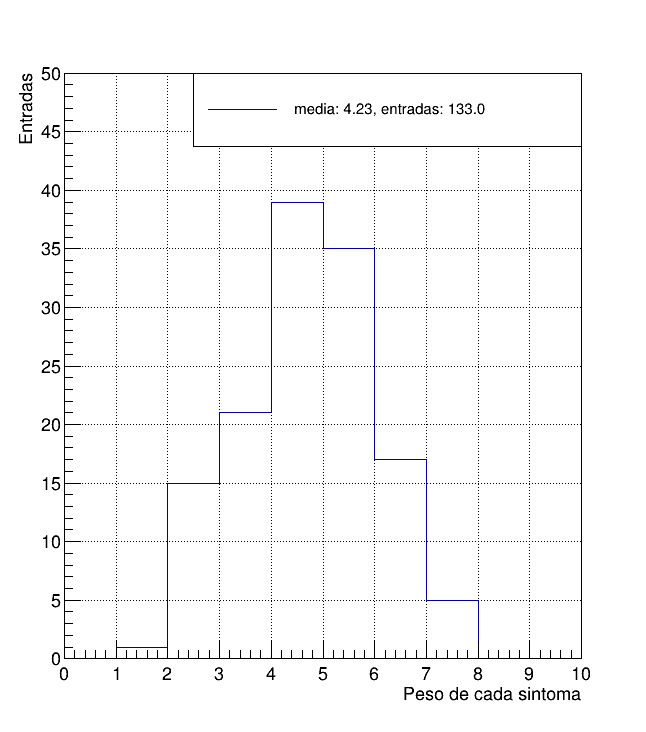

In [18]:
Tp = TH1F("Pesos","",10, 0, 10)
we = severidad['weight'].values

for p in we:
   Tp.Fill(p)

Tp.SetStats(0)

mean_uno = Tp.GetMean()
entries_uno = Tp.GetEntries()

Tp.SetMaximum(50)
Tp.GetYaxis().SetLabelSize(0.03)
Tp.GetYaxis().SetTitleSize(0.03)
Tp.GetXaxis().SetLabelSize(0.03)
Tp.GetXaxis().SetTitleSize(0.03)
c = TCanvas("Tp", "canvas", 650 , 760)
Tp.Draw("")

legend = ROOT.TLegend(0.3, 0.8, 0.9, 0.9)
legend.SetTextSize(0.025)
legend.AddEntry(Tp, f" media: {mean_uno:.2f}, entradas: {entries_uno}", "l")
legend.Draw()

Tp.SetTitle(";Peso de cada sintoma; Entradas")
c.Draw()
c.SetGrid()
#c.SaveAs('dist.png')

Comprobando que este archivo contenga los síntomas del primero:

In [19]:
sint = severidad['Symptom'].unique()
print(sint)

['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_s

In [20]:
severidad['weight']

0      1
1      3
2      4
3      4
4      5
      ..
128    2
129    4
130    2
131    3
132    5
Name: weight, Length: 133, dtype: int64

In [21]:
severidad['weight'].values[0]

1

Podemos ver la ponderación de peso para cada síntoma como la erupción de la piel, por ejemplo. De esta manera, se puede relacionar con valores cuantitativos las enfermedades del primer archivo:

In [22]:
severidad[ severidad['Symptom'] == 'skin_rash' ]['weight'].values[0]

3

Entonces, podemos crear una relación entre el primer archivo de las enfermedades con sus síntomas, y  los pesos de cada síntoma:

In [23]:
valores = df.values
valores_filtrados = valores

for i in range(len(sint)):
    j = severidad[severidad['Symptom'] == sint[i]]['weight'].values[0]
    print(sint[i], valores)
    valores_filtrados[valores == sint[i]] = j


itching [['Fungal infection' 'itching' 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 'itching' 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]
skin_rash [['Fungal infection' 1 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 1 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]
nodal_skin_eruptions [['Fungal infection' 1 3 ... 0 0 0]
 ['Fungal infection' 3 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 1 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
 

In [24]:
severidad_nuevo = pd.DataFrame(valores_filtrados,  columns = df.columns )
severidad_nuevo.head()

Disease Symptom_1 Symptom_2            Symptom_3  \
0  Fungal infection         1         3                    4   
1  Fungal infection         3         4  dischromic _patches   
2  Fungal infection         1         4  dischromic _patches   
3  Fungal infection         1         3  dischromic _patches   
4  Fungal infection         1         3                    4   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic _patches         0         0         0         0         0   
1                    0         0         0         0         0         0   
2                    0         0         0         0         0         0   
3                    0         0         0         0         0         0   
4                    0         0         0         0         0         0   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

  Symptom_16 Symptom_17  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

De nuevo, aquellos síntomas que no tengan peso se asignará valor 0 (tomar en cuenta que esta información es arbitraria):

In [25]:
severidad_nuevo = severidad_nuevo.replace('dischromic _patches', 0)
severidad_nuevo = severidad_nuevo.replace('spotting_ urination',0)
severidad_nuevo = severidad_nuevo.replace('foul_smell_of urine',0)
severidad_nuevo.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal infection          1          3          4          0          0   
1  Fungal infection          3          4          0          0          0   
2  Fungal infection          1          4          0          0          0   
3  Fungal infection          1          3          0          0          0   
4  Fungal infection          1          3          4          0          0   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

Así mismo,  podemos consultar las precauciones que se pueden seguir de acuerdo a cada tipo de enfermedad:

In [26]:
precaucion = pd.read_csv('/content/HPC_II/Taller_aprendizaje_supervisado/symptom_precaution.csv')
precaucion.head()

Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths

Vamos a traducir las precauciones:

In [27]:
translator = Translator()
enfermedad = []
prec_uno = []
prec_dos = []
prec_tres = []
prec_cuatro = []

for i, element in precaucion.iterrows():
   d = element['Disease']
   f = translator.translate(d , src = 'en' , dest = 'es' ).text
   puno = element['Precaution_1']
   nuno = translator.translate(puno , src = 'en' , dest = 'es' ).text
   pdos = element['Precaution_2']
   ndos = translator.translate(pdos , src = 'en' , dest = 'es' ).text
   ptres = element['Precaution_3']
   ntres = translator.translate(ptres , src = 'en' , dest = 'es' ).text
   pcuatro = element['Precaution_4']
   ncuatro = translator.translate(pcuatro , src = 'en' , dest = 'es' ).text
   enfermedad.append(f)
   prec_uno.append(nuno)
   prec_dos.append(ndos)
   prec_tres.append(ntres)
   prec_cuatro.append(ncuatro)

precaucion['Enfermedad'] = enfermedad
precaucion['Precación 1'] = prec_uno
precaucion['Precación 2'] = prec_dos
precaucion['Precación 3'] = prec_tres
precaucion['Precación 4'] = prec_cuatro

precaucion.head()

Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4          Enfermedad  \
0                    follow up  reacción de drogas   
1           keep mosquitos out             Malaria   
2  use ice to compress itching             Alergia   
3             get proper sleep      hipotiroidismo   
4                   salt baths            Soriasis   

                                 Precación 1  \
0                      detener la irritación   
1             Consultar hospital más cercano   
2                           aplicar calamina   
3                           reduce el estres   
4  lavarse las manos con agua jabonosa tibia   

                          Precación 2                      Precación 3  \
0    consulte el hospital más cercano             deja de tomar drogas   
1             evita la comida grasosa  evitar la comida no vegetariana   
2          cubrir el área con vendaje                             yaya   
3                           ejercicio                        come sano   
4  detener el sangrado usando presión                 consultar medico   

                           Precación 4  
0                 hacer un seguimiento  
1    mantener alejados a los mosquitos  
2  use hielo para comprimir la picazón  
3                          dormir bien  
4                         baños de sal

Veamos si alguna columna de síntomas contiene solo ceros:

In [28]:
(severidad_nuevo[ df.columns ] == 0).all()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4     False
Symptom_5     False
Symptom_6     False
Symptom_7     False
Symptom_8     False
Symptom_9     False
Symptom_10    False
Symptom_11    False
Symptom_12    False
Symptom_13    False
Symptom_14    False
Symptom_15    False
Symptom_16    False
Symptom_17    False
dtype: bool

Comprobamos los objetivos o nombre de las enfermedades a predecir:

In [29]:
severidad_nuevo['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Podemos contar cuantas veces aparece una cierta enfermedad en la viarable objetivo, notando que esta se encuentra balanceada:

In [30]:
severidad_nuevo['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [31]:
severidad_nuevo.shape

(4920, 18)

In [32]:
severidad_nuevo.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal infection          1          3          4          0          0   
1  Fungal infection          3          4          0          0          0   
2  Fungal infection          1          4          0          0          0   
3  Fungal infection          1          3          0          0          0   
4  Fungal infection          1          3          4          0          0   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

Podemos comprobar la distribución de valores de los tres primeros síntomas:

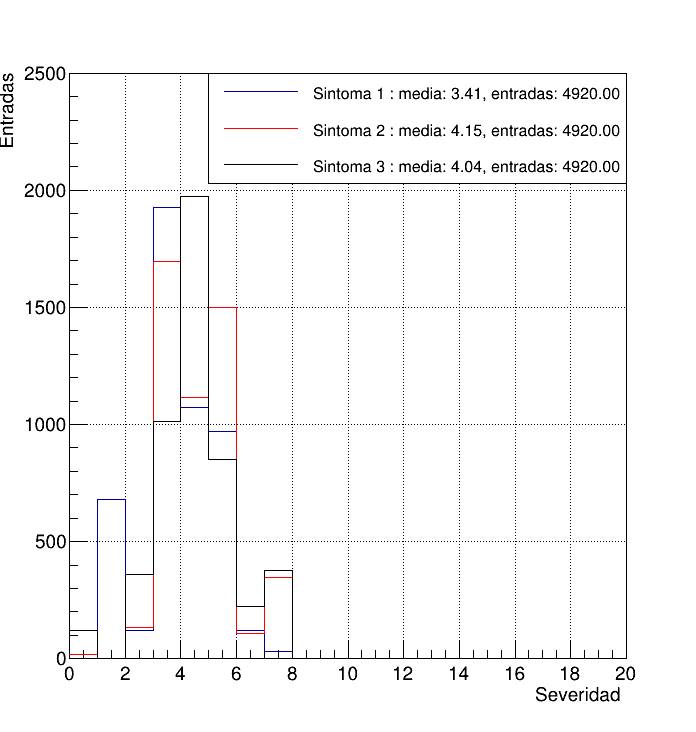

In [33]:

T1 = TH1F("Sintoma 1","",20, 0, 20)
sin_uno = severidad_nuevo['Symptom_1'].values

T2 = TH1F("Sintoma 2","",20, 0, 20)
sin_dos = severidad_nuevo['Symptom_2'].values

T3 = TH1F("Sintoma 3","",20, 0, 20)
sin_tres = severidad_nuevo['Symptom_3'].values

for a in sin_uno:
   T1.Fill(a)

for b in sin_dos:
   T2.Fill(b)

for c in sin_tres:
   T3.Fill(c)

T1.SetStats(0)
T2.SetLineColor(kRed )
T3.SetLineColor(kBlack )

mean_uno = T1.GetMean()
entries_uno = T1.GetEntries()

mean_dos = T2.GetMean()
entries_dos = T2.GetEntries()

mean_tres = T3.GetMean()
entries_tres = T3.GetEntries()

T1.SetMaximum(2500)
T1.GetYaxis().SetLabelSize(0.03)
T1.GetYaxis().SetTitleSize(0.03)
T1.GetXaxis().SetLabelSize(0.03)
T1.GetXaxis().SetTitleSize(0.03)
c = TCanvas("T1", "canvas", 700 , 760)
T1.Draw("")
T2.Draw("SAME")
T3.Draw("SAME")

legend = ROOT.TLegend(0.3, 0.75, 0.9, 0.9)
legend.SetTextSize(0.025)
legend.AddEntry(T1, f"Sintoma 1 : media: {mean_uno:.2f}, entradas: {entries_uno:.2f}", "l")
legend.AddEntry(T2, f"Sintoma 2 : media: {mean_dos:.2f}, entradas: {entries_dos:.2f}", "l")
legend.AddEntry(T3, f"Sintoma 3 : media: {mean_tres:.2f}, entradas: {entries_tres:.2f}", "l")
legend.Draw()

T1.SetTitle(";Severidad ; Entradas")
c.Draw()
c.SetGrid()

Plot de correlación.

Podemos observar la relación entre los síntomas o las variables que usamos para predecir o clasificar bajo el esquema supervisado mediante un gŕafico de correlacion. Dichas relaciones matemáticas pueden ser de muy diferente tipo (lineal, no lineal, logarítimica, etc). En este caso, analizamos dichas relaciones mediante el método de Pearson, Spearman y Kendall:

<ipython-input-34-23d08ceac0b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = severidad_nuevo.corr(method = 'pearson')


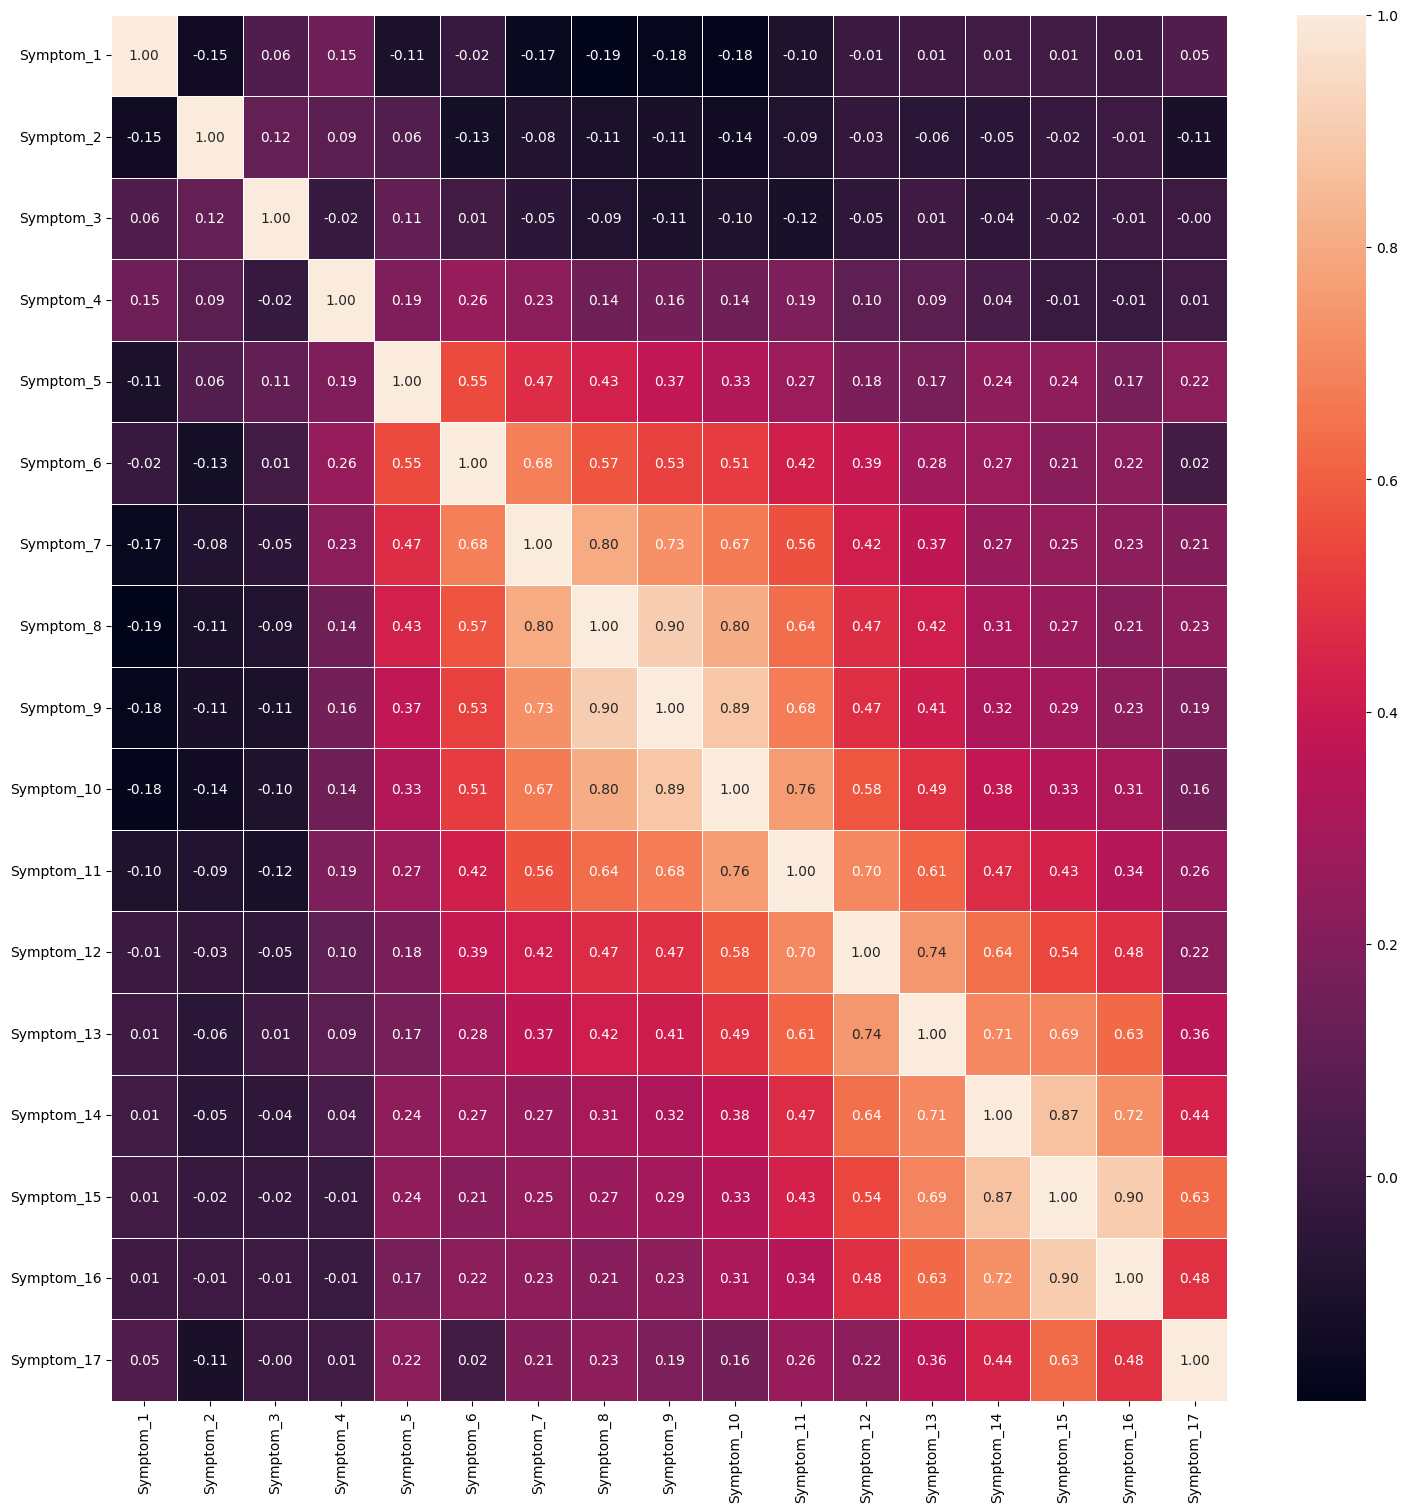

In [34]:
correlation_matrix = severidad_nuevo.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-35-a5cf1e5cdc3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_sp = severidad_nuevo.corr(method='spearman')


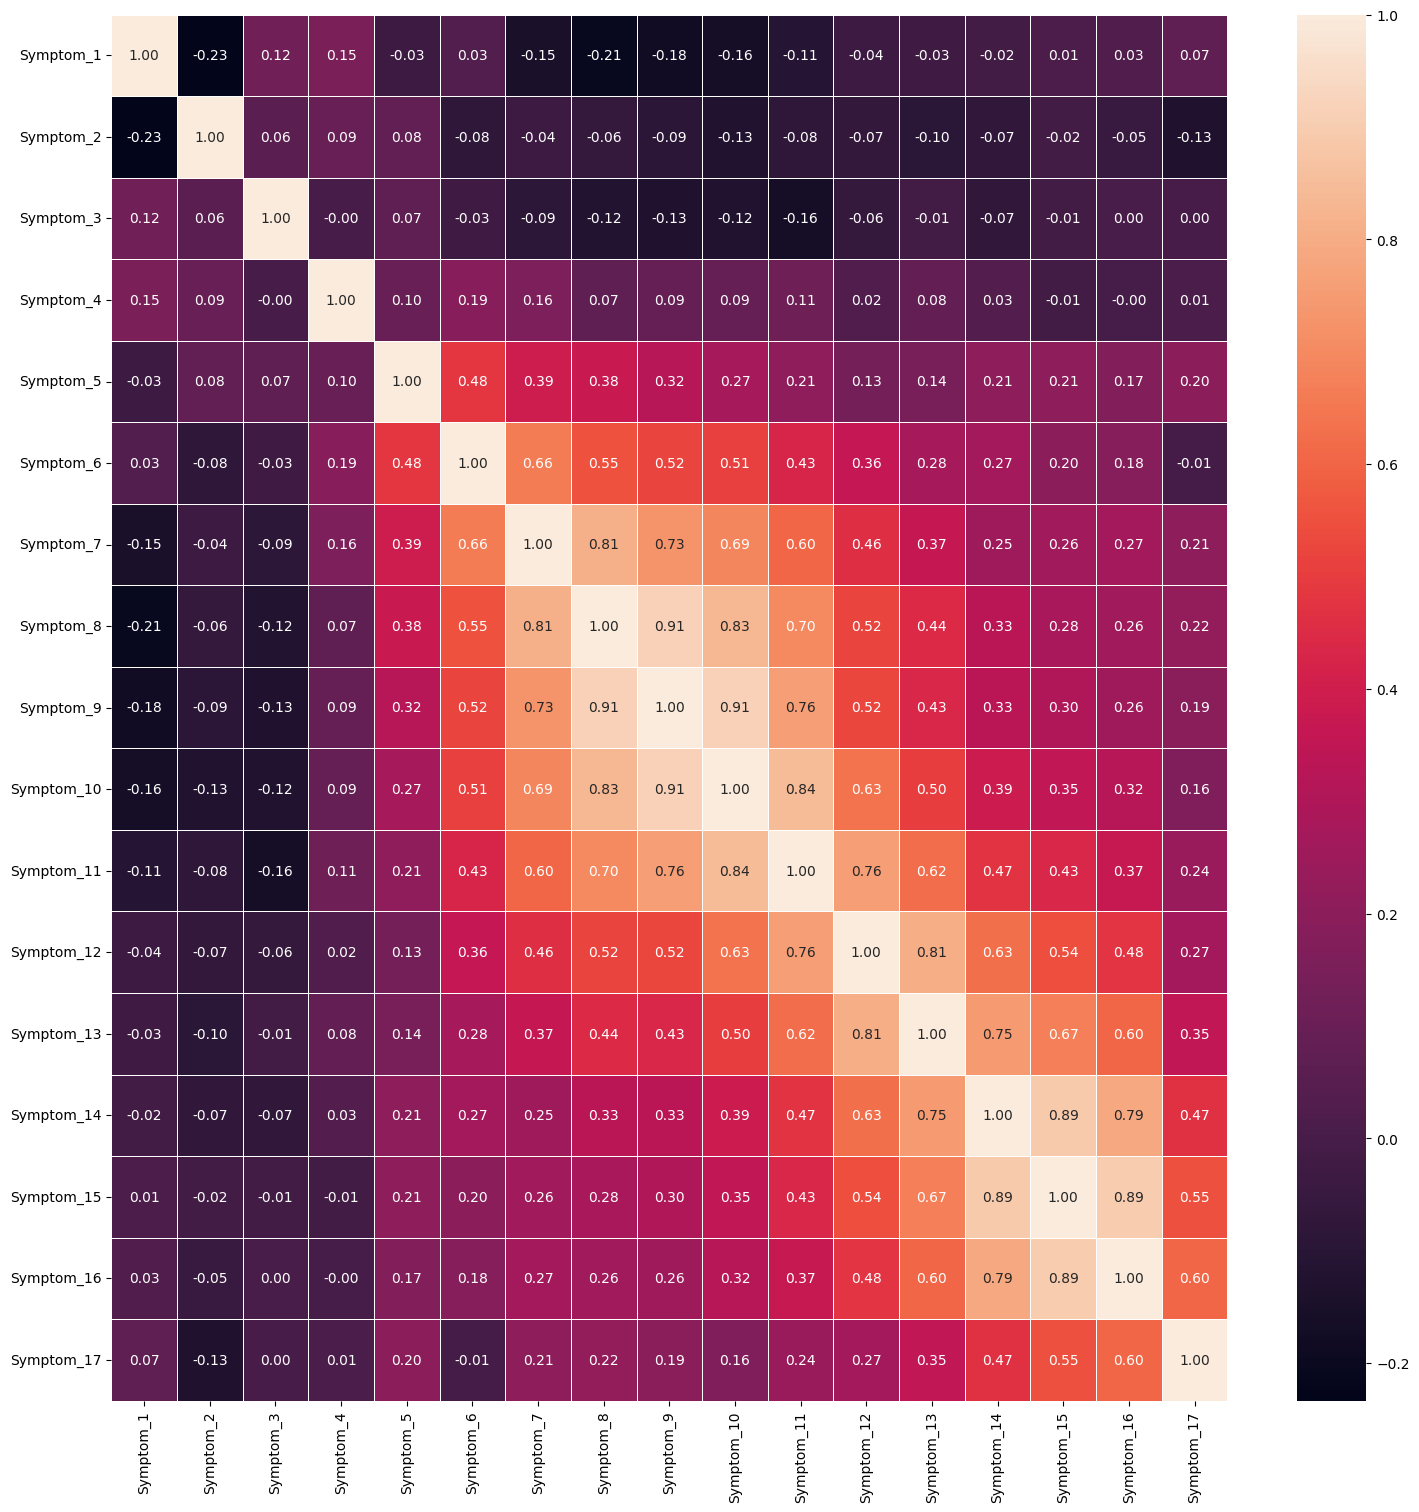

In [35]:
correlation_matrix_sp = severidad_nuevo.corr(method='spearman')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_sp , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-36-1fbd0df261c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_kend = severidad_nuevo.corr(method='kendall')


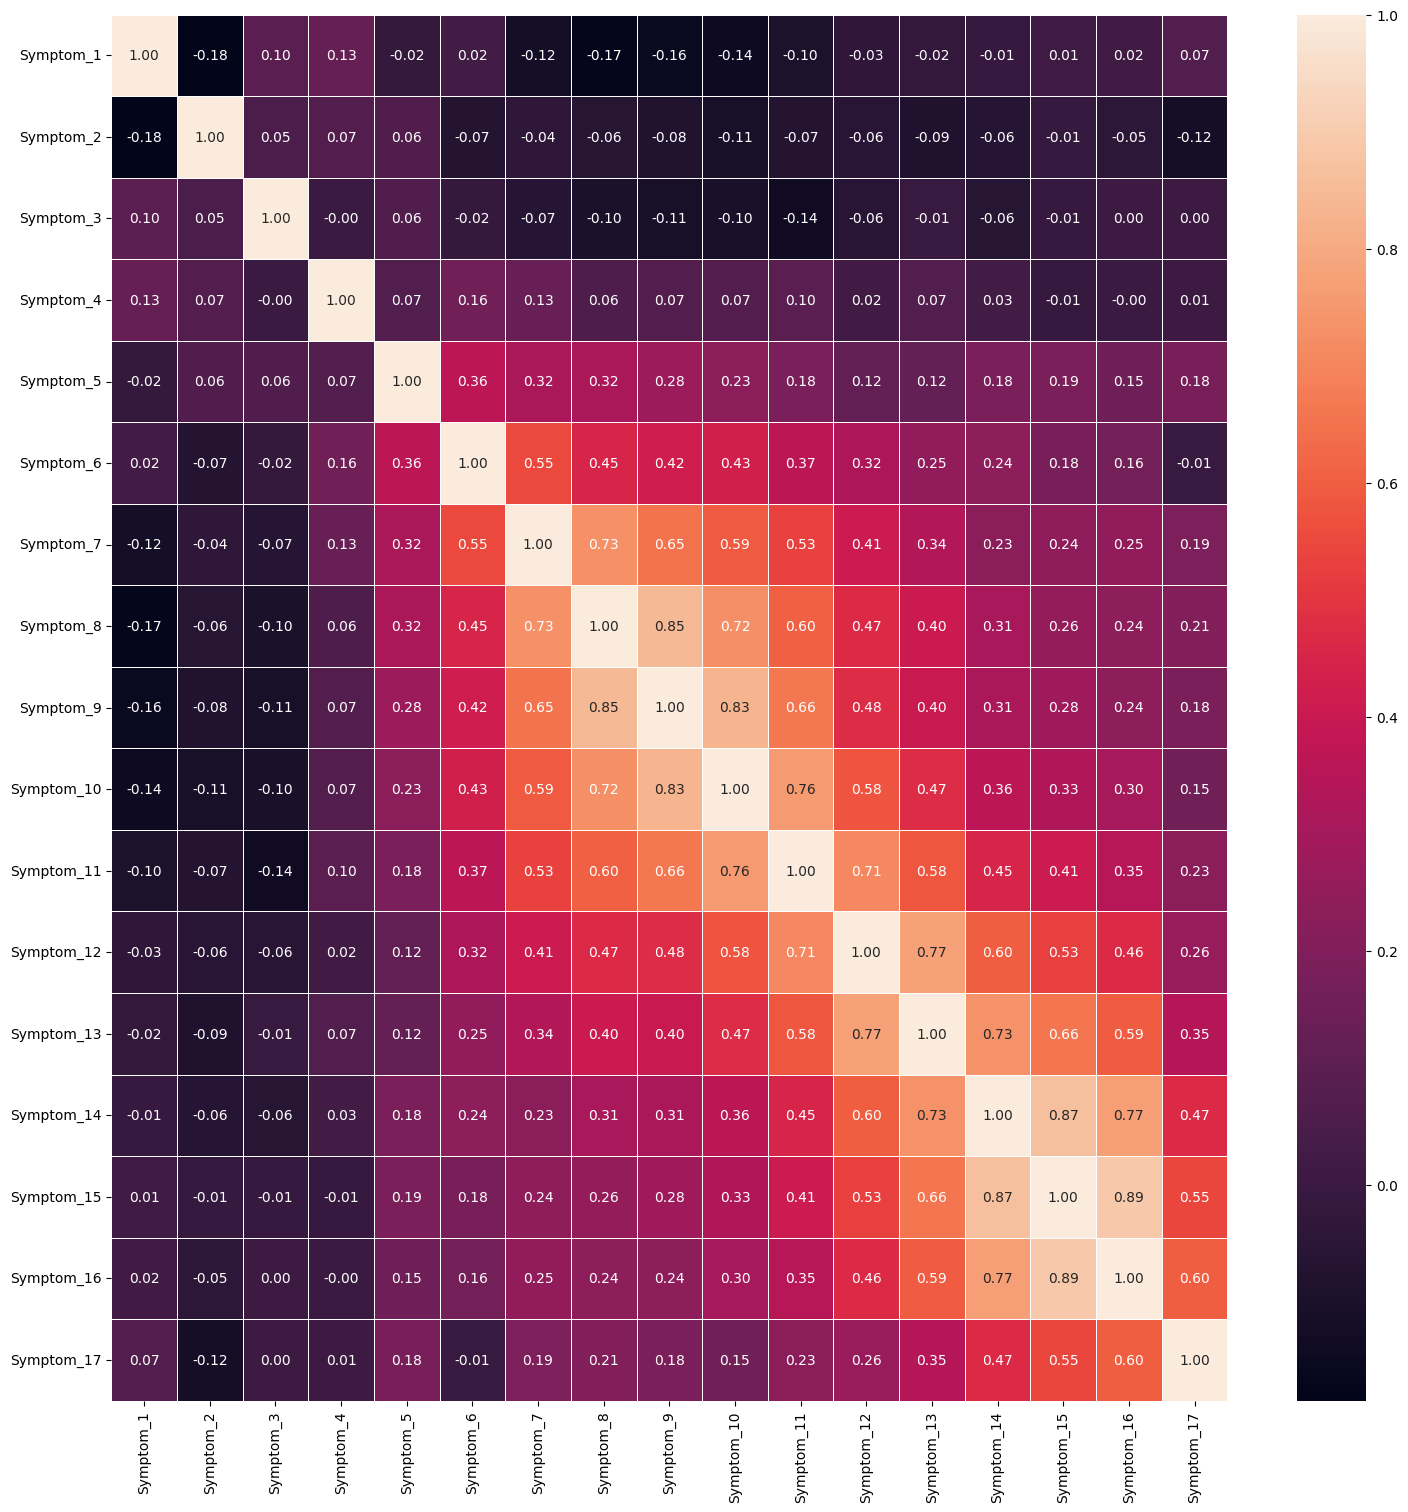

In [36]:
correlation_matrix_kend = severidad_nuevo.corr(method='kendall')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_kend , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

Vamos a usar este conjunto de datos para entrenar algunos modelos propuestos, separando entre las variables de síntomas y la variable objetivo (enfermedades):

In [37]:
dat = severidad_nuevo.drop(['Disease'],axis=1)
dat.head()

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0          1          3          4          0          0          0   
1          3          4          0          0          0          0   
2          1          4          0          0          0          0   
3          1          3          0          0          0          0   
4          1          3          4          0          0          0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0  
1           0           0           0           0           0  
2           0           0           0           0           0  
3           0           0           0           0           0  
4           0           0           0           0           0

In [38]:
target = severidad_nuevo['Disease'].values
target

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [39]:
print(target[0])

Fungal infection


Vamos a separar el conjunto de datos entre datos de entrenamiento y datos de prueba:


<img src="https://github.com/OscarHuesos/II-mini_Workshop_HPC_Supervised/blob/main/holdout.jpg?raw=true:, width=800" alt="simd" width=600>

Figura 1. La técnica de de división de datos más sencilla se conoce como hold-out, que consiste en dividir datos que se usarán tanto en entrenamiento como de testeo con la misma distribución.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(dat, target, shuffle=True, train_size = 0.7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3444, 17) (1476, 17) (3444,) (1476,)


Una parte importante en análisis de datos, es observar la distribución de datos de cada variable (en este caso cada síntoma), de esto se pueden sacar muchas deduciones incluso sin aplicar algún método de aprendizaje:

<ipython-input-41-277b5621c99f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = 'red')
<ipython-input-41-277b5621c99f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = '

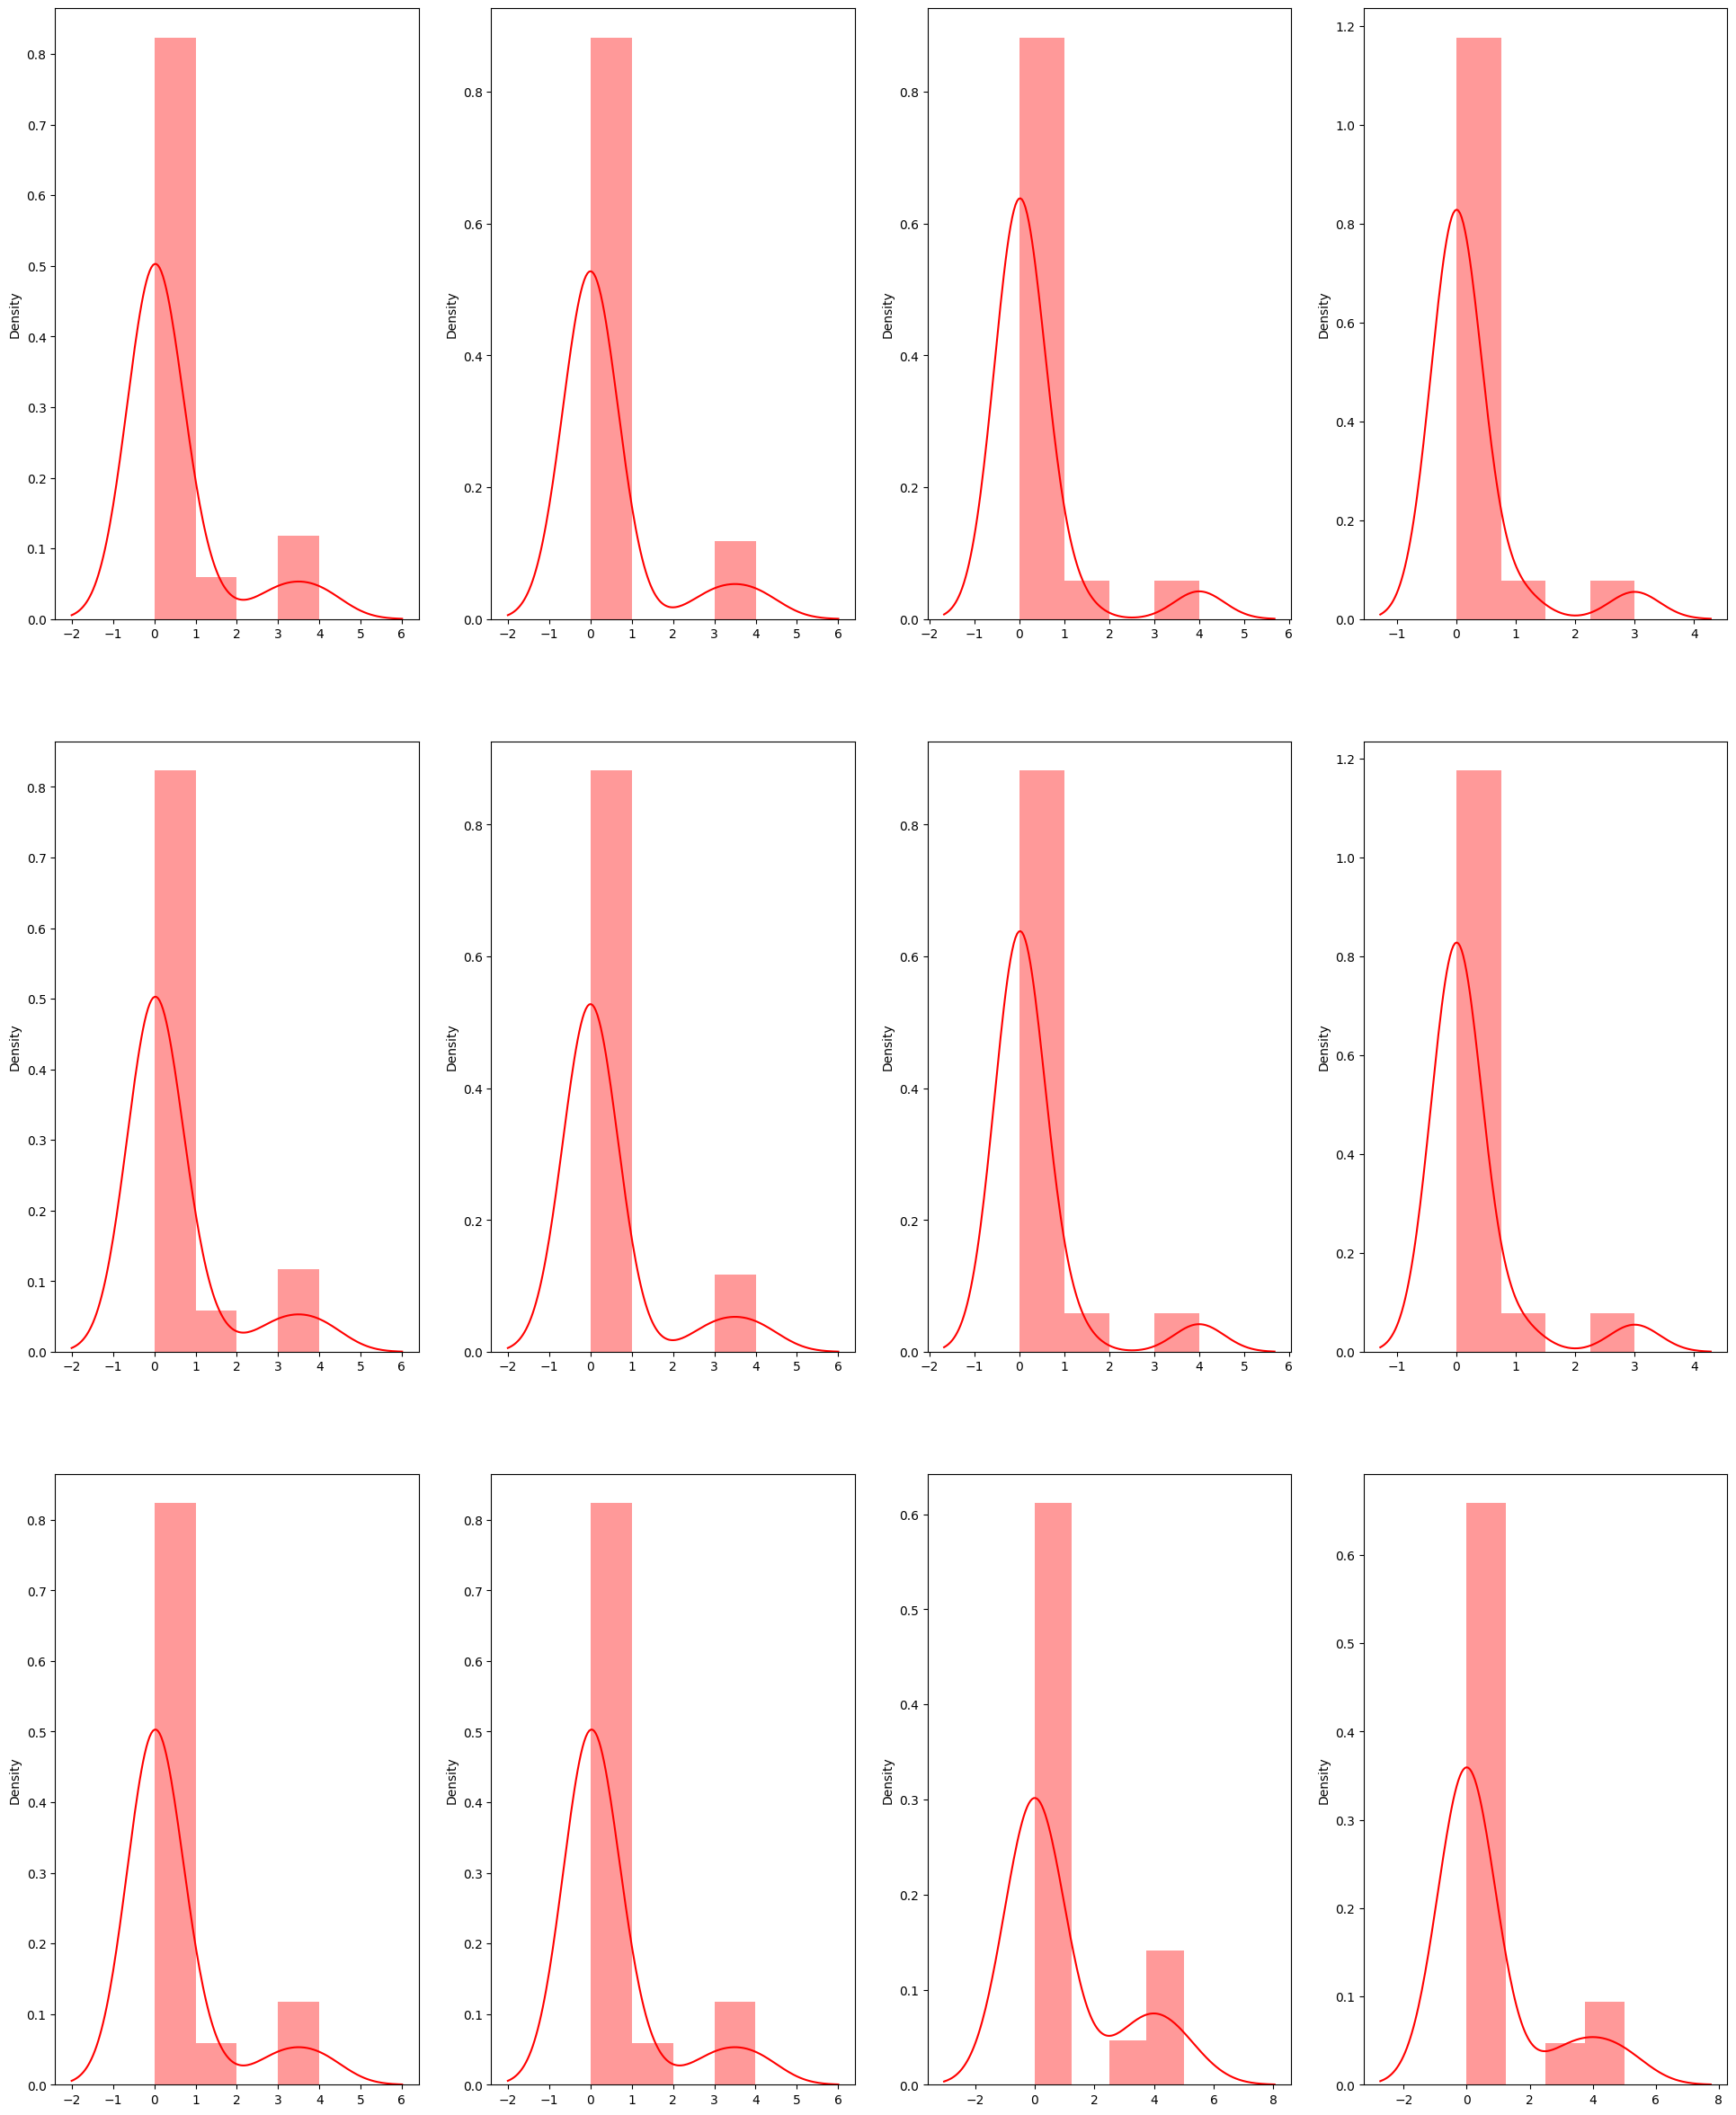

In [41]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0

for i in range(3):
    for j in range(4):
            sns.distplot( severidad_nuevo.iloc[:,1:].values[k], ax = ax1[i][j], color = 'red')
            k += 1


# Random Forest (Bosque aleatorio)

Como primer método de aprendizaje automático basado en árboles de decisión, se aplicará el bosque aleatorio (Random Forest):

<img src="https://github.com/OscarHuesos/II-mini_Workshop_HPC_Supervised/blob/main/forest.png?raw=true:, width=800" alt="simd" width=900>

Figura 2. Esquema general de un bosque aleatorio, compuesta por varios sub-elementos (árboles).

Se entrena el modelo con una profundidad baja (1) y 10 estimadores (número de árboles en el bosque):

In [42]:
rf_model = RandomForestClassifier(max_depth=1 , n_estimators = 10, random_state=0,  oob_score=True  )
start = time.time()
rf_model.fit(x_train , y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 0.08205199241638184s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Veamos lo que predice:

In [43]:
pred_forest = rf_model.predict(x_test)
pred_forest

array(['Arthritis', 'Chronic cholestasis', 'Chronic cholestasis', ...,
       'Hypoglycemia', 'Hypoglycemia', 'Arthritis'], dtype=object)

Midamos la precisión (Accuracy):

In [44]:
rf_model.score(x_test, y_test)

0.12872628726287264

Así mismo, el bosque aleatorio puede medir la importancia o el nivel de contribución que tiene cada variable al clasificador mediante varias métricas, en este caso, se usará el índice Gini para calcular la media de disminución de impureza (Mean Decrease in Impurity MDI, por sus siglas en inglés):

In [45]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

El índice Gini en los árboles de decisión puede ser estimado como:

\begin{equation}
G = 1 - \sum_{i=1}^{n}(P_{i})^{2}
\end{equation}

Donde $P_{i}$ es la probabilidad de un valor objetivo $i$ de ser clasificado en una clase a la que no pertenece, por lo que valores altos de ésta metrica no son deseadas.


MDI cuenta las veces que una cierta característica de entrada se usa para dividr un nodo en un cierto árbol. Entonces se promedia a lo largo de todos los árboles.





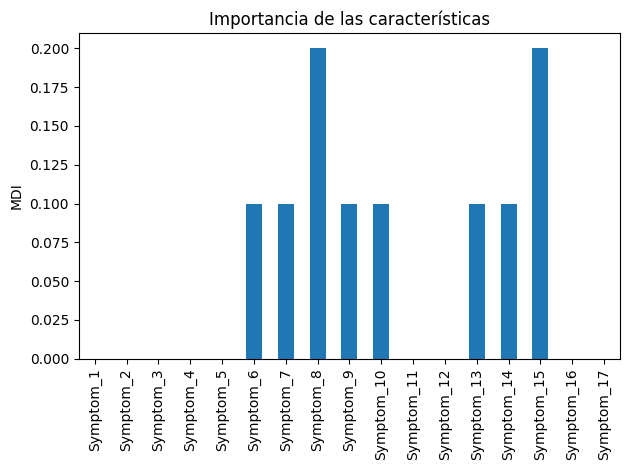

In [46]:
forest_importances = pd.Series(importances, index = dat.columns )

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

Este índice tambien se puede obtener en forma de lista:

In [47]:
IMP = rf_model.feature_importances_.argsort()
print("Características principales (de derecha a izquierda en importancia):")
print(IMP)

Características principales (de derecha a izquierda en importancia):
[ 0 11 10 15 16  3  2  1  4  5  6  9 12 13  8  7 14]


Salvaremos el modelo entrenado (muy útil cuando los tiempos de entrenamiento son muy tardados):

In [48]:
pickle.dump(rf_model , open("rf.pickle.dat", "wb"))

Cada árbol que compone el bosque aleatorio se compone de un subconjunto de los datos de entrenamiento. Se puede acceder a cada uno y observar las divisiones de sus hojas, la cantidad de muestras que se usaron en cada división y las variables involucradas:

[Text(0.5, 0.75, 'x[8] <= 3.5\ngini = 0.975\nsamples = 2177\nvalue = [93, 81, 85, 84, 84, 89, 78, 93, 91, 88, 90, 66\n84, 112, 75, 76, 69, 70, 89, 104, 88, 70, 88, 66\n97, 98, 101, 63, 89, 67, 88, 81, 89, 88, 82, 84\n86, 77, 73, 90, 78]'),
 Text(0.25, 0.25, 'gini = 0.965\nsamples = 1504\nvalue = [93, 81, 85, 84, 84, 89, 78, 93, 0, 88, 0, 0, 0\n112, 75, 76, 69, 70, 89, 0, 88, 36, 0, 66, 97\n0, 0, 63, 89, 67, 88, 81, 89, 88, 0, 84, 0, 0\n73, 90, 0]'),
 Text(0.75, 0.25, 'gini = 0.92\nsamples = 673\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 91, 0, 90, 66, 84, 0\n0, 0, 0, 0, 0, 104, 0, 34, 88, 0, 0, 98, 101\n0, 0, 0, 0, 0, 0, 0, 82, 0, 86, 77, 0, 0, 78]')]

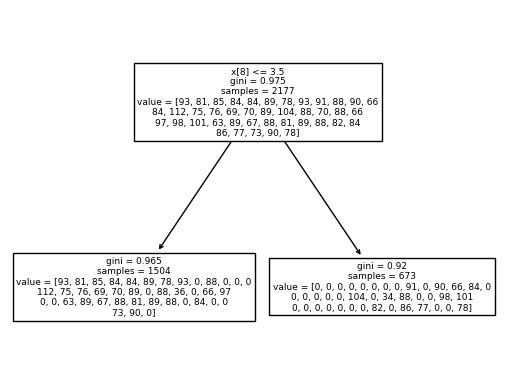

In [49]:
tree.plot_tree(rf_model.estimators_[0])

Usando la interfaz de Graphviz, la visualización de estos árboles mejora:

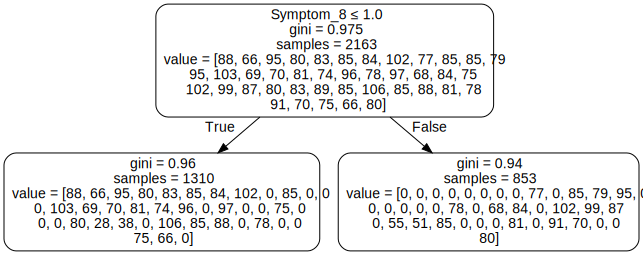

In [50]:
ss = tree.export_graphviz(rf_model.estimators_[1] , out_file=None, feature_names=dat.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(ss)
graph

Una métrica muy útil que usan los clasificadores basados en subconjuntos (Bagging) es el error Out-of-Bag (OOB), el cual mide el número de clasificaciones érroneas promedio por cada árbol de otro subconjunto (bootstrap) árbitrario que no contiene las obervaciones con no están en el árbol. Este valor depende fuertemente del número de árboles y la profundidad del bosque. Valores bajos sugieren mayor generalización del método.


In [51]:
OOB=rf_model.oob_score_
print("error oob:")
print(OOB)

error oob:
0.08420441347270616


Las matrices de confusión son una poderosa herramienta para la evaluación del clasificador. Cuando los valores en la diagonal coinciden con sus respectivos índices, implica que las clases a predecir coinciden con el resultado del predictor, caso contrario, se toma como una mala clasificación:

In [52]:
conf_mat_forest = confusion_matrix(y_test, pred_forest)
print(  conf_mat_forest  )

[[19  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [15  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


Otras métricas útiles son:

\begin{equation}
Precision = \frac{TP}{TP + FP} \ \ \ \ \ Recall = \frac{TP}{TP + FN} \ \ \ \ \ \ F_{1-score} = 2.0* \frac{Precision*Recall}{Precision + Recall}
\end{equation}

Las matrices de confusión se construyen a partir de los datos de la varible objetivo (enfermedades) reservada para la evaluación y los valores que arroja el predictor:

F1-score (valor-F) = 5.9457670923995485 | Accuracy (precisión) = 12.872628726287264


<Axes: >

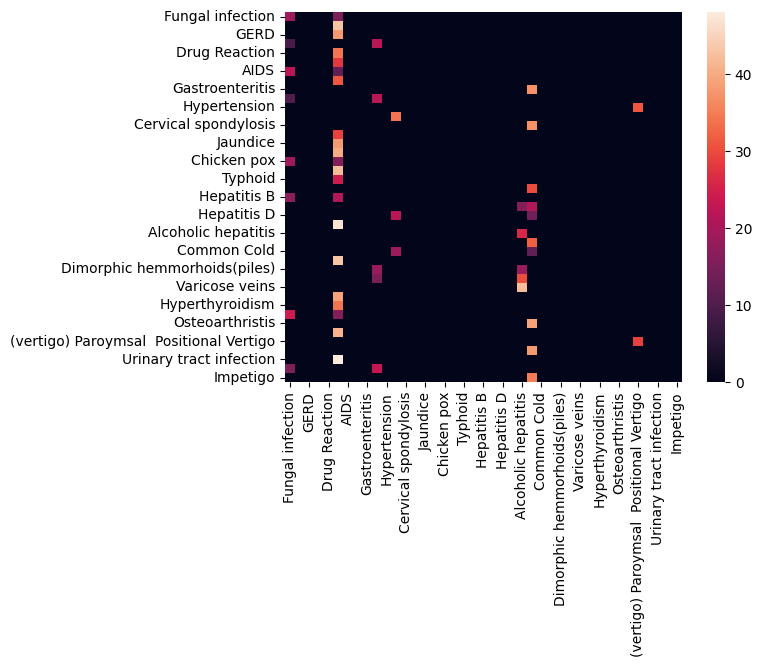

In [53]:
df_forest = pd.DataFrame(conf_mat_forest, index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score (valor-F) =', f1_score(y_test, pred_forest , average='macro')*100, '|', 'Accuracy (precisión) =', accuracy_score(y_test, pred_forest)*100)
sns.heatmap(df_forest)

LA curva ROC (Receiver-Operating-Characteristic, por sus siglas en inglés), refleja el comportamiento de la clasificación de valores de una clase (positiva) frente a las demás clases. Usualmente se emplea en clasificación binaria. Se busca una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

Para el caso de obtener una curva ROC para clasificación no binaria, primero binarizaremos las salidad de las clases( cada clase se transforma en 1 si corresponde a la seleccionada, caso contrario en 0), dividiendo el número de muestras y clases:

In [54]:
label_binarizer = LabelBinarizer().fit(y_train)
y_t = label_binarizer.transform(y_test)
y_t.shape

(1476, 41)

In [55]:
print(y_t)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Establezcamos una clase objetivo con su identificador:

In [56]:
class_of_interest = "GERD"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

16

In [57]:
y_p = label_binarizer.transform( pred_forest)
y_p.shape

(1476, 41)

Como estrategia, se usarán las probabilidades de cada muestra en el conjunto de datos de testeo (técnica de mpliación del umbral).

In [59]:
pred_forest_pro = rf_model.predict_proba(x_test)
pred_forest_pro

array([[0.03348443, 0.03203846, 0.03560537, ..., 0.03216282, 0.02806861,
        0.0114398 ],
       [0.0294894 , 0.02287854, 0.02459503, ..., 0.02281251, 0.03289998,
        0.01929195],
       [0.0294894 , 0.02287854, 0.02459503, ..., 0.02281251, 0.03289998,
        0.01929195],
       ...,
       [0.01409532, 0.01004776, 0.00923399, ..., 0.00972159, 0.01739691,
        0.04528993],
       [0.01409532, 0.01004776, 0.00923399, ..., 0.00972159, 0.01739691,
        0.04528993],
       [0.03348443, 0.03203846, 0.03560537, ..., 0.03216282, 0.02806861,
        0.0114398 ]])

In [61]:
pred_forest_pro.shape

(1476, 41)

In [ ]:
#y_pro = label_binarizer.transform( pred_forest_pro )
#y_pro.shape

In [63]:
y_p[:, class_id]

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
pred_forest_pro[: ,class_id ]

array([0.03101972, 0.0261582 , 0.0261582 , ..., 0.01230872, 0.01230872,
       0.03101972])

En este primer ejemplo, obtendremos el peor resultado para esta métrica. La curva ROC es usulamente construida de esta forma:


Text(0.5, 1.0, 'Curva ROC')

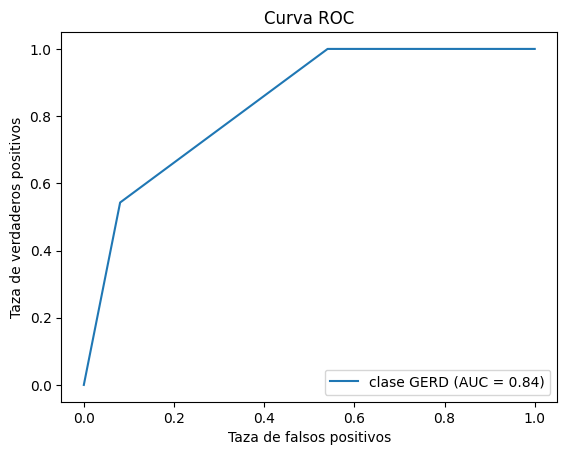

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] , pred_forest_pro[: ,class_id ] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=f"clase {class_of_interest}")
display.plot()

plt.xlabel("Taza de falsos positivos")
plt.ylabel("Taza de verdaderos positivos")
plt.title("Curva ROC")

# Gradient Boosting (Potenciador de gradiente)

El segundo método, también basado en árboles de decisión, es del tipo boosting, el cual se basa en usar una combinación de varios modelos simples, normalmente entrenando una base de árboles inicial, y re-entrenando cada árbol con un subconjunto aleatorio de entrenamiento nuevo. Usaremos los mismos parámetros que en el bosque aleatorio:




In [67]:
GB = GradientBoostingClassifier (n_estimators=10, random_state=30  ,max_depth=1  )

In [68]:
start = time.time()
GB.fit(x_train , y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 1.9272589683532715s


In [69]:
pred_gb = GB.predict(x_test)
pred_gb

array(['Allergy', 'Chronic cholestasis', 'Chronic cholestasis', ...,
       'Diabetes', 'Typhoid', 'Arthritis'], dtype=object)

Podemos también salvar dicho modelo:

In [70]:
# guardar el modelo
pickle.dump(GB, open("gb.pickle.dat", "wb"))

Así mismo, podemos extraer las características más importantes:

In [71]:
IMP2 = GB.feature_importances_.argsort()
print("Características principales (de derecha a izquierda en importancia):")
print(IMP2)

Características principales (de derecha a izquierda en importancia):
[13  6  9 16 12  5 11 10  7 14  4  3 15  8  2  0  1]


Midamos la precisión (Accuracy):

In [72]:
GB.score(x_test, y_test)

0.8414634146341463

Se calcula la matriz de confusión:

In [73]:
conf_mat_gb = confusion_matrix(y_test, pred_gb)
print(  conf_mat_gb  )

[[26  0  0 ...  0  0  0]
 [ 0 33  0 ...  3  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  3 ... 45  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 35]]


F1-score (valor-F) = 83.99169423078486 | Accuracy (precisión) = 84.14634146341463


<Axes: >

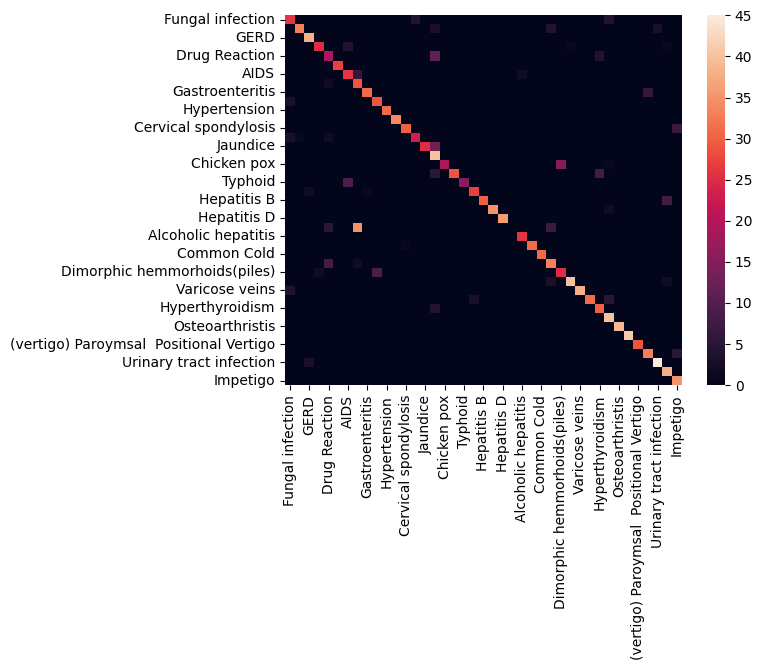

In [74]:
df_gb = pd.DataFrame(conf_mat_gb, index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score (valor-F) =', f1_score(y_test, pred_gb , average='macro')*100, '|', 'Accuracy (precisión) =', accuracy_score(y_test, pred_gb)*100)
sns.heatmap(df_gb)

Calcularemos la curva ROC, así como el valor AUC de la característica GERD (notable mejoría):

In [75]:
y_gb = label_binarizer.transform( pred_gb)
y_gb.shape

(1476, 41)

In [76]:
pred_gb_pro = GB.predict_proba(x_test)
pred_gb_pro

array([[0.01442238, 0.01331917, 0.01254564, ..., 0.01585879, 0.01442636,
        0.01461417],
       [0.0119899 , 0.01107276, 0.01042969, ..., 0.01318405, 0.01199321,
        0.01214934],
       [0.0119899 , 0.01107276, 0.01042969, ..., 0.01318405, 0.01199321,
        0.01214934],
       ...,
       [0.02504241, 0.00980422, 0.00923482, ..., 0.01167362, 0.06954941,
        0.01075746],
       [0.0119238 , 0.0046847 , 0.00441263, ..., 0.00557795, 0.01100989,
        0.00514018],
       [0.02874381, 0.01125333, 0.01059977, ..., 0.01339905, 0.01218879,
        0.01234747]])

In [77]:
pred_gb_pro[: ,class_id ]

array([0.02070768, 0.01721512, 0.01721512, ..., 0.01524288, 0.00728343,
       0.01749586])

Text(0.5, 1.0, 'Curva ROC')

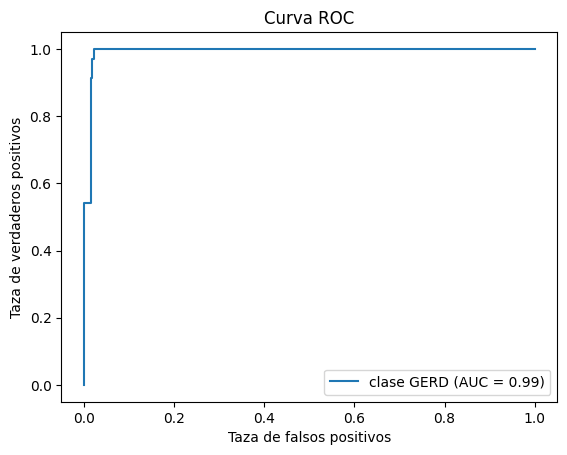

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] ,  pred_gb_pro[: ,class_id ] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=f"clase {class_of_interest}")
display.plot()

plt.xlabel("Taza de falsos positivos")
plt.ylabel("Taza de verdaderos positivos")
plt.title("Curva ROC")

# Suport Vector Machine (Máquina de vector soporte)

Para comparación, usaremos como tercer modelo una máquina de vector soporte (SVC) sin especificar ningún parámetro salvo el cálculo de las probabilidades de las clases.



In [89]:
svc_model = SVC( probability= True )
start = time.time()
svc_model.fit(x_train, y_train)
stop = time.time()

print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 1.5969960689544678s


In [90]:
pred_svc = svc_model.predict(x_test)
pred_svc

array(['Allergy', 'Chronic cholestasis', 'Chronic cholestasis', ...,
       'Diabetes', 'Typhoid', 'Arthritis'], dtype=object)

In [91]:
pickle.dump(svc_model, open("svc.pickle.dat", "wb"))

Vamos a crear la matriz de confusión de SVC:

In [92]:
conf_mat_svc = confusion_matrix(y_test, pred_svc)
print(  conf_mat_svc  )

[[26  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 35]]


F1-score (valor F) = 93.21994562661234 | Accuracy (exactitud) = 93.42818428184282


<Axes: >

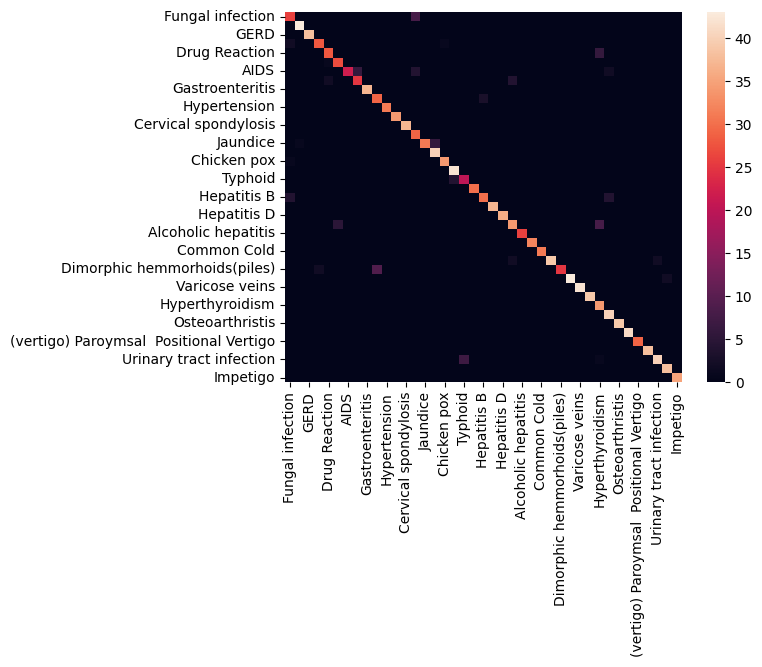

In [93]:
df_svc = pd.DataFrame(conf_mat_svc, index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score (valor F) =', f1_score(y_test, pred_svc , average='macro')*100, '|', 'Accuracy (exactitud) =', accuracy_score(y_test, pred_svc)*100)
sns.heatmap(df_svc)

Calcularemos la curva ROC de SVC:

In [94]:
y_svm = label_binarizer.transform( pred_svc)
y_svm.shape

(1476, 41)

In [95]:
pred_svm_pro = svc_model.predict_proba(x_test)
pred_svm_pro

array([[0.00221415, 0.00382082, 0.00331614, ..., 0.00392738, 0.00129974,
        0.00098812],
       [0.0011885 , 0.00089188, 0.00082494, ..., 0.0009216 , 0.00683623,
        0.00136283],
       [0.0011885 , 0.00089188, 0.00082494, ..., 0.0009216 , 0.00683623,
        0.00136283],
       ...,
       [0.00118792, 0.00090393, 0.00069983, ..., 0.00133701, 0.00202969,
        0.02000115],
       [0.00112489, 0.0012377 , 0.00069692, ..., 0.00153842, 0.00147346,
        0.00689597],
       [0.00188401, 0.00341501, 0.00166851, ..., 0.00124547, 0.00061254,
        0.00052938]])

In [96]:
pred_svm_pro[: ,class_id ]

array([0.00209192, 0.00175344, 0.00175344, ..., 0.00185634, 0.00163032,
       0.00108015])

Text(0.5, 1.0, 'Curva ROC')

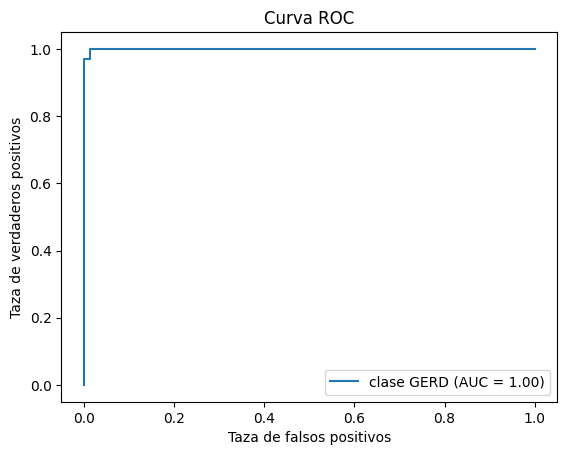

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] ,  pred_svm_pro[: ,class_id ] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name=f"clase {class_of_interest}")
display.plot()

plt.xlabel("Taza de falsos positivos")
plt.ylabel("Taza de verdaderos positivos")
plt.title("Curva ROC")

# Bosque aleatorio con parámetros aumentados.

Ahora, repetimos el procedimiento empleado en el bosque aleatorio con parámetros diferentes:

In [106]:
rf_model_dos = RandomForestClassifier(max_depth=10, n_estimators = 100, random_state=0 ,  oob_score=True  )
start = time.time()
rf_model_dos.fit(x_train , y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 0.9190022945404053s


In [107]:
pred_forest_dos = rf_model_dos.predict(x_test)
pred_forest_dos

array(['Allergy', 'Chronic cholestasis', 'Chronic cholestasis', ...,
       'Diabetes', 'Typhoid', 'Arthritis'], dtype=object)

Obtemos las características (síntomas) más relevantes para este clasificador, igualmente usando el MDI:

In [108]:
importances_dos = rf_model_dos.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_dos.estimators_], axis=0)

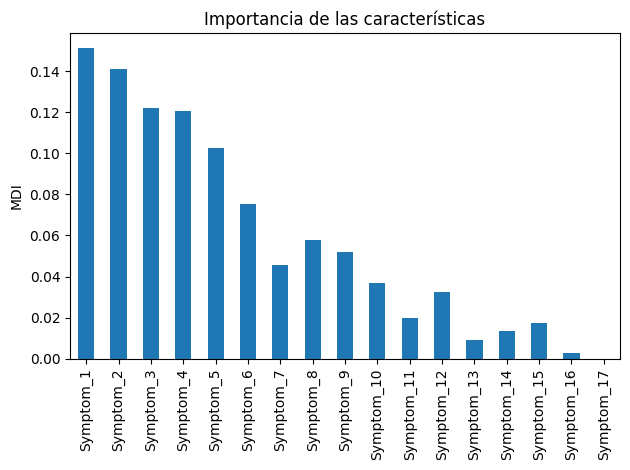

In [109]:
forest_importances_dos = pd.Series(importances_dos, index = dat.columns )

fig, ax = plt.subplots()
forest_importances_dos.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [110]:
IMP3 = rf_model_dos.feature_importances_.argsort()
print("Características principales (de derecha a izquierda en importancia):")
print(IMP3)

Características principales (de derecha a izquierda en importancia):
[16 15 12 13 14 10 11  9  6  8  7  5  4  3  2  1  0]


In [111]:
OOB3=rf_model_dos.oob_score_
print("error oob:")
print(OOB3)

error oob:
0.9866434378629501


In [112]:
pickle.dump(rf_model_dos , open("rf_dos.pickle.dat", "wb"))

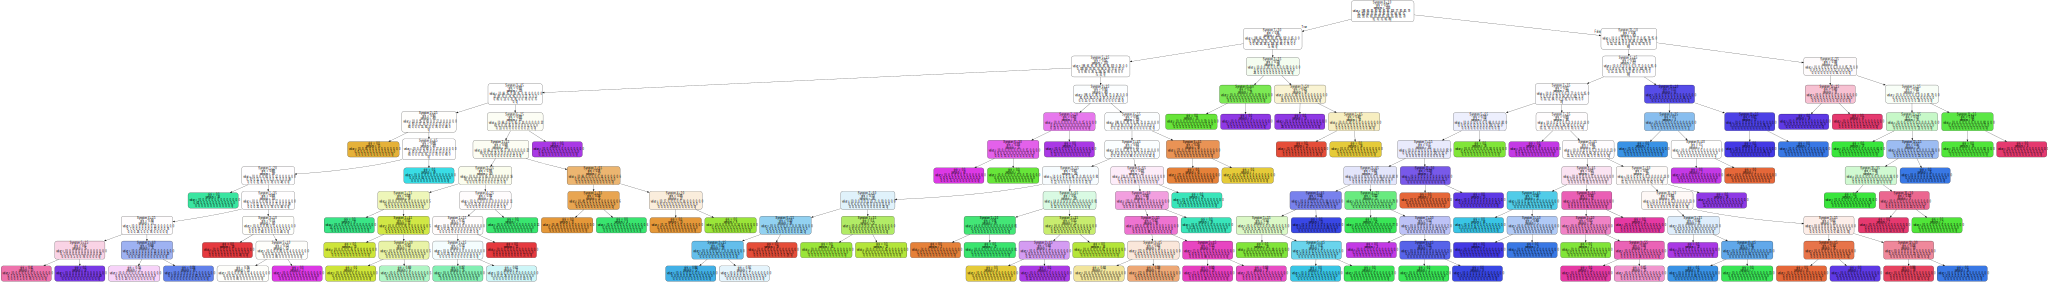

In [113]:
sx = tree.export_graphviz(rf_model_dos.estimators_[1] , out_file=None, feature_names=dat.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(sx)
graph

In [114]:
conf_mat_forest_dos = confusion_matrix(y_test, pred_forest_dos)
print(  conf_mat_forest_dos  )

[[30  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 35]]


F1-score (valor-F) = 98.8181578603933 | Accuracy (precisión) = 98.84823848238482


<Axes: >

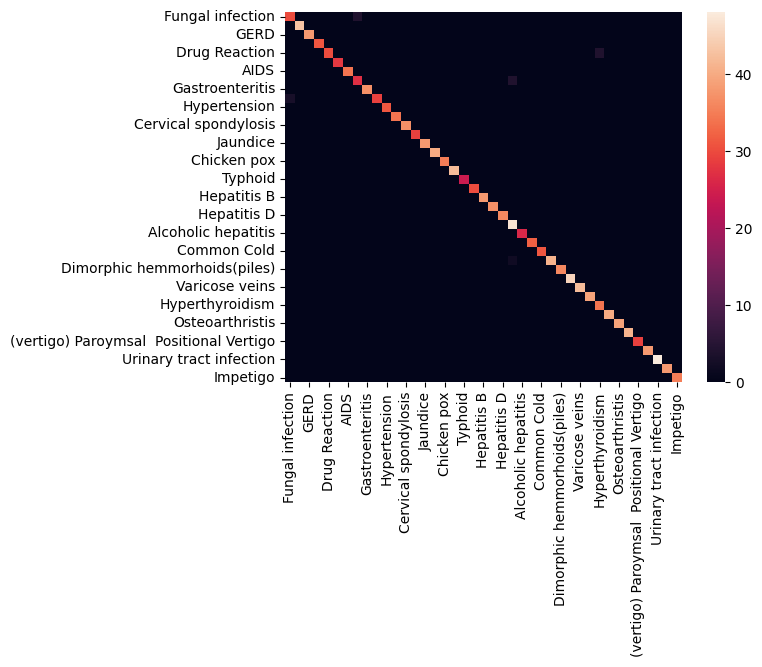

In [115]:
df_forest_dos = pd.DataFrame(conf_mat_forest_dos , index=severidad_nuevo['Disease'].unique(), columns=severidad_nuevo['Disease'].unique())

print('F1-score (valor-F) =', f1_score(y_test, pred_forest_dos , average='macro')*100, '|', 'Accuracy (precisión) =', accuracy_score(y_test, pred_forest_dos)*100)
sns.heatmap(df_forest_dos)

Calculamos la curva ROC de la variable GERD:

In [116]:
y_rff = label_binarizer.transform( pred_forest_dos)
y_rff.shape

(1476, 41)

In [117]:
pred_fo_pro =  rf_model_dos.predict_proba(x_test)
pred_fo_pro

array([[0.00093284, 0.00675652, 0.0010568 , ..., 0.00921018, 0.00380952,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00117178],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0039207 ,
        0.00790048],
       [0.        , 0.00351617, 0.00056818, ..., 0.01641104, 0.        ,
        0.        ]])

In [118]:
pred_fo_pro[: ,class_id ]

array([0.00108014, 0.        , 0.        , ..., 0.        , 0.        ,
       0.00010753])

Text(0.5, 1.0, 'Curva ROC')

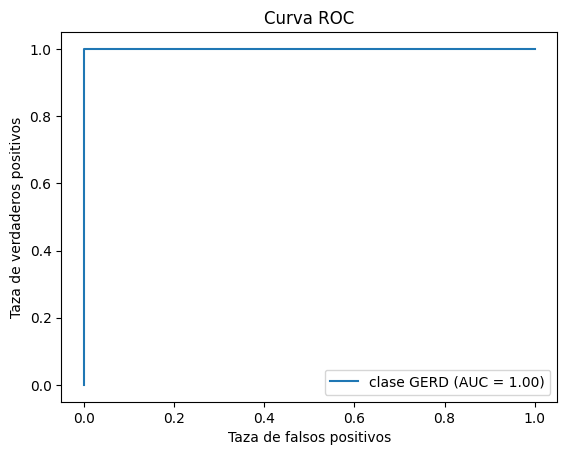

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_t[:, class_id] ,  pred_fo_pro[: ,class_id ]  )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=f"clase {class_of_interest}")
display.plot()

plt.xlabel("Taza de falsos positivos")
plt.ylabel("Taza de verdaderos positivos")
plt.title("Curva ROC")

Habiendo obtenido resultados adecuados, ahora usaremos la información de la correlación de las variables para reducir este número usado en la clasificación. Se omitirán correlaciones $\geq +0.8 $ en los tres métodos. Para ello , se siguen las reglas:

-Omitir síntoma 16 si se conserva el síntoma 15.

-Omitir síntoma 14 si se conserva el síntoma 15.

-Omitir síntoma  7 si se conserva el síntoma  8.

-Omitir síntoma  9 si se conserva el síntoma  8.

-Omitir síntoma 11 si se conserva el síntoma 10.




Entonces vamos a filtrar el conjunto de datos de los síntomas con la regla anterior:

In [120]:
severidad_reducido =pd.DataFrame(severidad_nuevo[[
'Disease',
'Symptom_1',
'Symptom_2',
'Symptom_3',
'Symptom_4',
'Symptom_5',
'Symptom_6',
#'Sympton_7',
'Symptom_8',
#'Sympton_9',
'Symptom_10',
#'Sympton_11',
'Symptom_12',
'Symptom_13',
#'Sympton_14',
'Symptom_15',
#'Sympton_16',
'Symptom_17',
] ]  )

Se revisa el nuevo conjunto de variables:

<ipython-input-121-b80830aca8fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_sp_dos = severidad_reducido.corr(method='spearman')


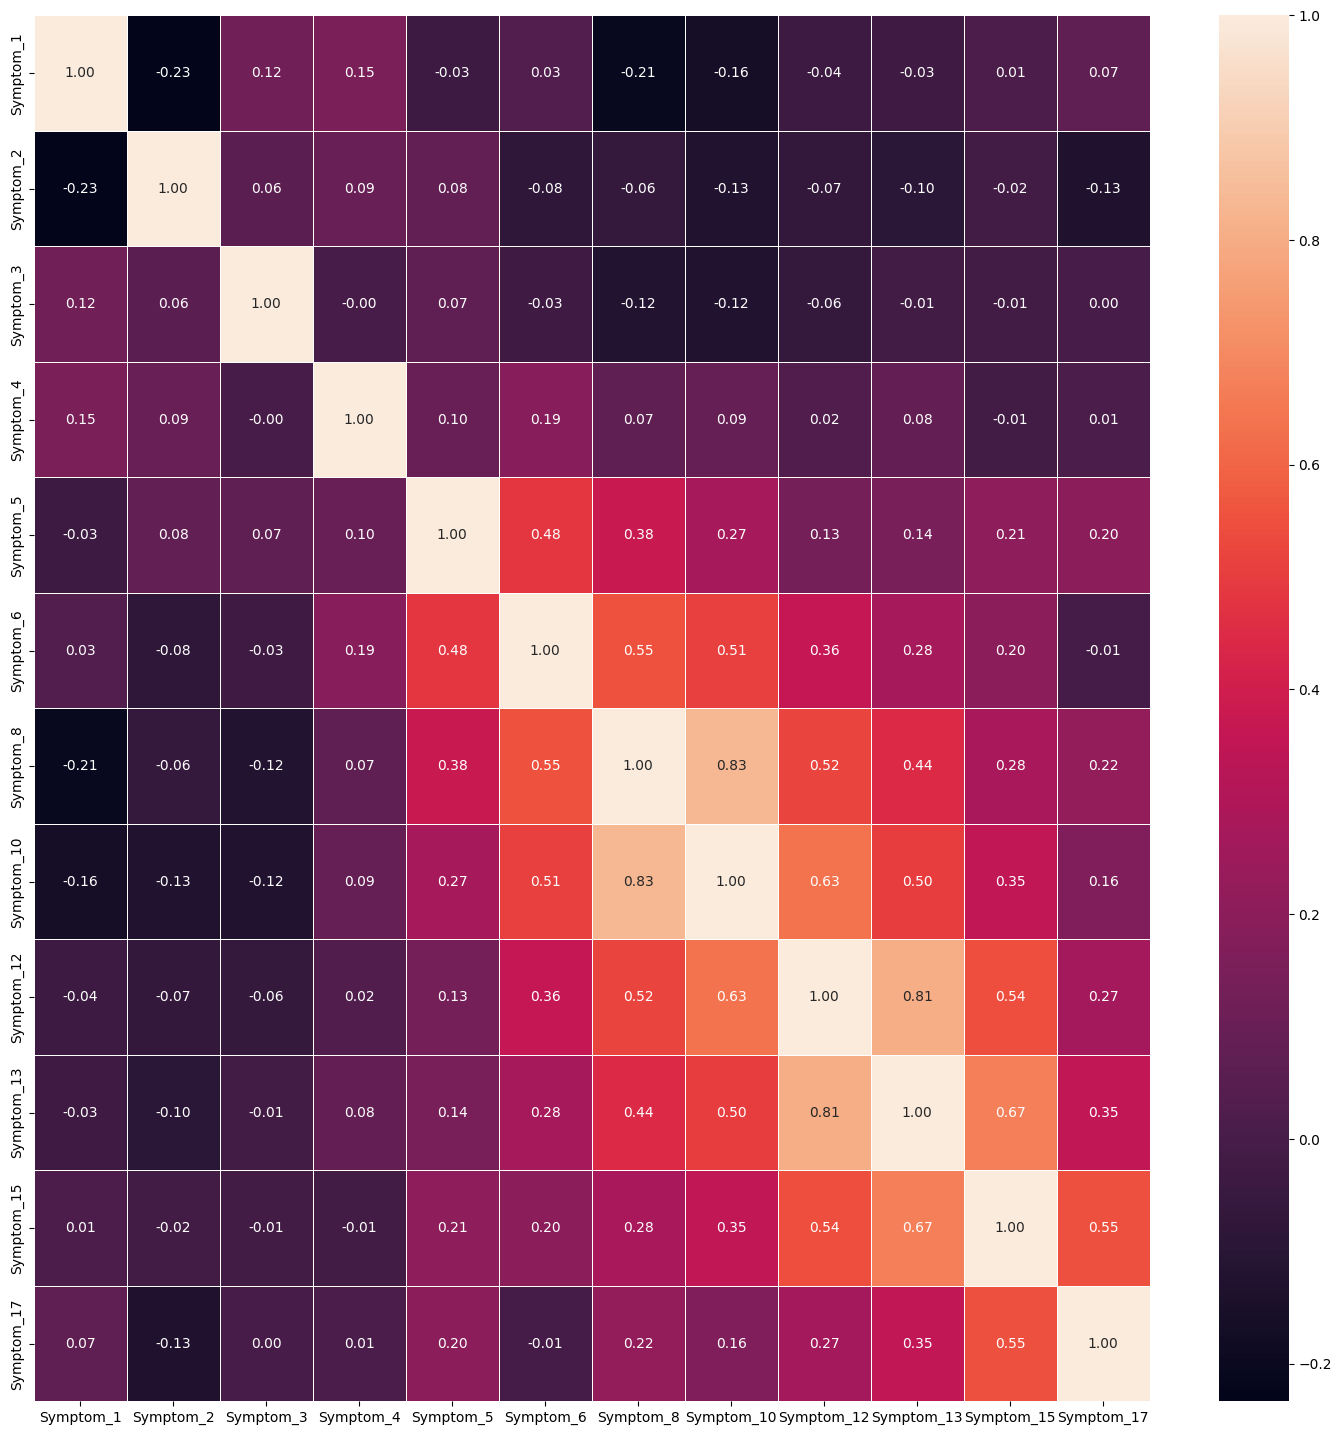

In [121]:
correlation_matrix_sp_dos = severidad_reducido.corr(method='spearman')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_sp_dos , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-122-270618b5159e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pers_dos = severidad_reducido.corr(method='pearson')


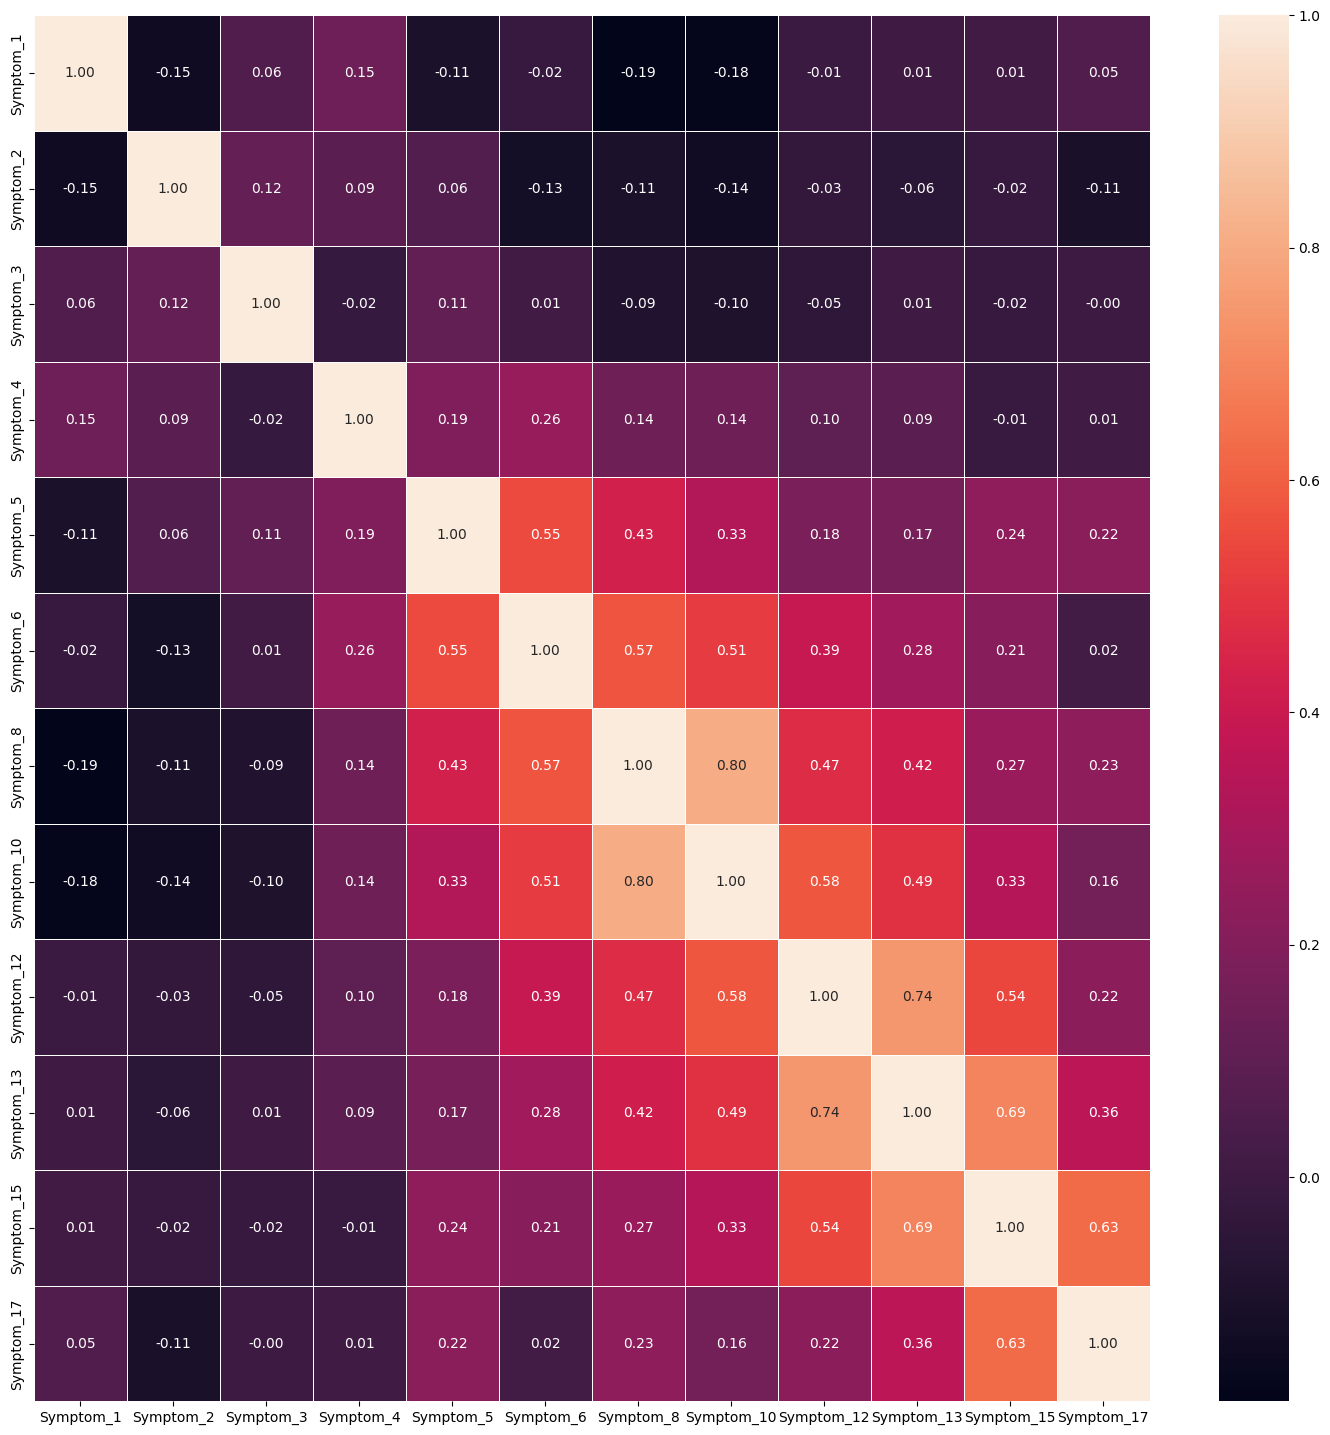

In [122]:
correlation_matrix_pers_dos = severidad_reducido.corr(method='pearson')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_pers_dos , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

<ipython-input-123-96b27e5d135b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_ken_dos = severidad_reducido.corr( method='kendall')


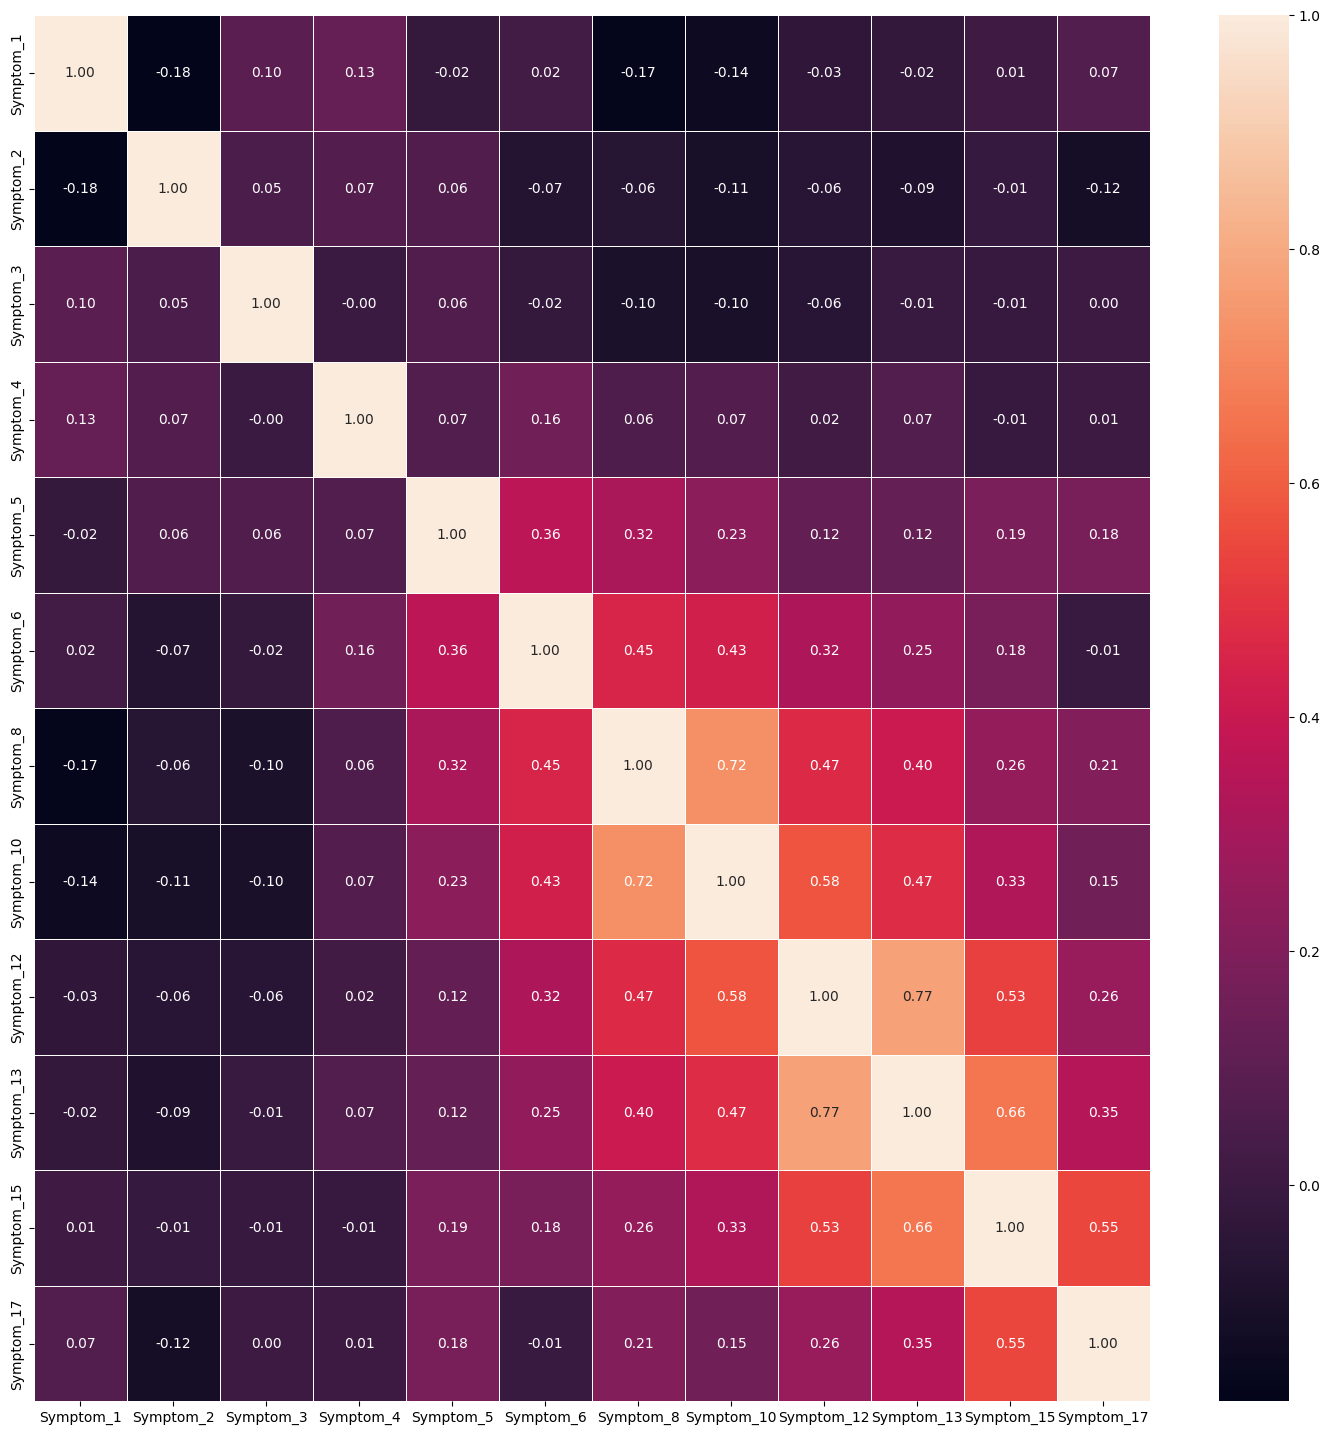

In [123]:
correlation_matrix_ken_dos = severidad_reducido.corr( method='kendall')
fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_ken_dos , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

In [124]:
datos = severidad_reducido.drop(['Disease'],axis=1)
datos.head()

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0          1          3          4          0          0          0   
1          3          4          0          0          0          0   
2          1          4          0          0          0          0   
3          1          3          0          0          0          0   
4          1          3          4          0          0          0   

   Symptom_8  Symptom_10  Symptom_12  Symptom_13  Symptom_15  Symptom_17  
0          0           0           0           0           0           0  
1          0           0           0           0           0           0  
2          0           0           0           0           0           0  
3          0           0           0           0           0           0  
4          0           0           0           0           0           0

Se prepara el nuevo conjunto de datos:

In [125]:
target = severidad_reducido['Disease'].values
target

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [126]:
x_train_dos, x_test_dos, y_train_dos, y_test_dos = train_test_split(datos, target, shuffle=True, train_size = 0.7)
print(x_train_dos.shape, x_test_dos.shape, y_train_dos.shape, y_test_dos.shape)

(3444, 12) (1476, 12) (3444,) (1476,)


Nuevamente, se usa el bosque aleatorio mejorado para entrenar este nuevo conjunto de datos:

In [127]:
rf_model_tres = RandomForestClassifier(max_depth=10, n_estimators = 100, random_state=0 ,  oob_score=True  )
start = time.time()
rf_model_tres.fit(x_train_dos , y_train_dos )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 0.44400548934936523s


In [128]:
pred_forest_tres = rf_model_tres.predict(x_test_dos)

In [129]:
sc_rf_dos = rf_model_tres.score(x_test_dos , y_test_dos)
sc_rf_dos

0.9898373983739838

Se obtiene la nueva lista de síntomas más usadas en la clasificación:

In [130]:
importances_tres = rf_model_tres.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_tres.estimators_], axis=0)

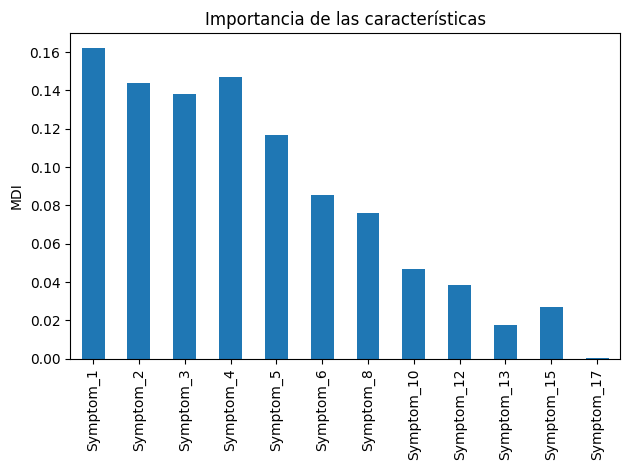

In [131]:
forest_importances_tres = pd.Series(importances_tres, index = datos.columns )

fig, ax = plt.subplots()
forest_importances_tres.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [132]:
IMP4 = rf_model_tres.feature_importances_.argsort()
print("Características principales (de derecha a izquierda en importancia):")
print(IMP4)

Características principales (de derecha a izquierda en importancia):
[11  9 10  8  7  6  5  4  2  1  3  0]


In [133]:
OOB4=rf_model_tres.oob_score_
print("error oob:")
print(OOB4)

error oob:
0.9909988385598142


In [134]:
pickle.dump(rf_model_tres, open("rf_tres.pickle.dat", "wb"))

In [135]:
conf_mat_forest_tres = confusion_matrix(y_test_dos, pred_forest_tres)
print(  conf_mat_forest_tres  )

[[39  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 34]]


F1-score (valor-F) = 99.02061028394581 | Accuracy (precisión) = 98.98373983739837


<Axes: >

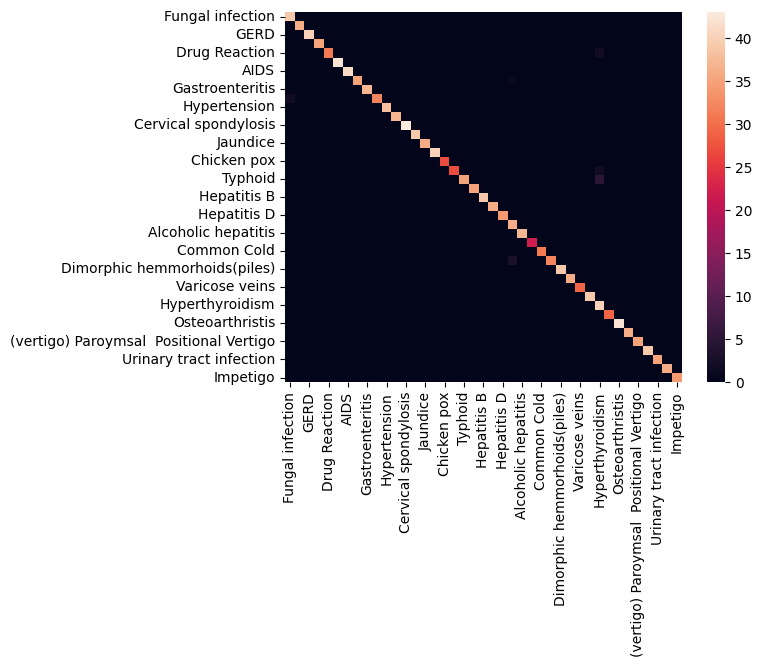

In [136]:
df_forest_tres = pd.DataFrame(conf_mat_forest_tres , index=severidad_reducido['Disease'].unique(), columns=severidad_reducido['Disease'].unique())

print('F1-score (valor-F) =', f1_score(y_test_dos , pred_forest_tres , average='macro')*100, '|', 'Accuracy (precisión) =', accuracy_score(y_test_dos , pred_forest_tres)*100)
sns.heatmap(df_forest_tres)

Un resumen de un árbol que compone el bosque aleatorio puede mostrarse como:

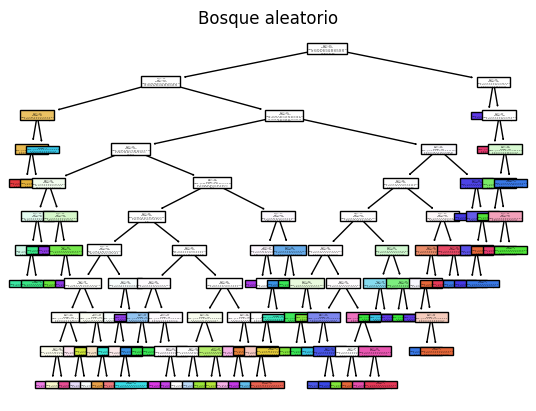

In [137]:
plt.figure()
plot_tree( rf_model_tres.estimators_[1] , filled=True)
plt.title("Bosque aleatorio")
plt.show()

La curva ROC es entonces:

In [138]:
label_binarizer = LabelBinarizer().fit(y_train_dos)
y_ft = label_binarizer.transform(y_test_dos)
y_ft.shape

(1476, 41)

In [139]:
y_pf = label_binarizer.transform( pred_forest_tres)
y_pf.shape

(1476, 41)

In [140]:
pred_ff_pro = rf_model_tres.predict_proba(x_test_dos)
pred_ff_pro

array([[0.00055825, 0.00152881, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00107802, 0.05071569, 0.00300258, ..., 0.00587617, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0005    , 0.        , ..., 0.00798384, 0.        ,
        0.        ],
       [0.00055825, 0.00152881, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00366906, 0.        , ..., 0.        , 0.        ,
        0.        ]])

Text(0.5, 1.0, 'Curva ROC')

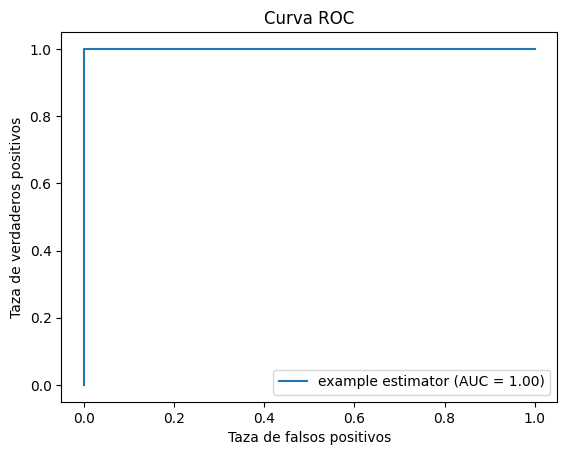

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_ft[:, class_id] ,  pred_ff_pro[:, class_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.xlabel("Taza de falsos positivos")
plt.ylabel("Taza de verdaderos positivos")
plt.title("Curva ROC")

Vemos que se mantiene la calidad de la clasificación, aún usando menos síntomas.

## Ejercicio 2. Clasificación de la calidad del vino rojo.

Los datos de este ejemplo de clasificación supervisada se pueden encontrar en:

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009



El archivo consiste en una serie de características físicas y químicas del vino rojo, el cual en función de estas, se puede establecer una escala de calidad:

In [142]:
wine = pd.read_csv("/content/HPC_II/Taller_aprendizaje_supervisado/winequality-red.csv")
wine.head()
print(wine.columns)
print(wine.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [143]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Comprobamos que no tenga celdas NaN:

In [144]:
wine['pH'].isnull().values.any()

False

Obtenemos la lista de características:

In [145]:
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Observemos la distribución de la variable objetivo (calidad):

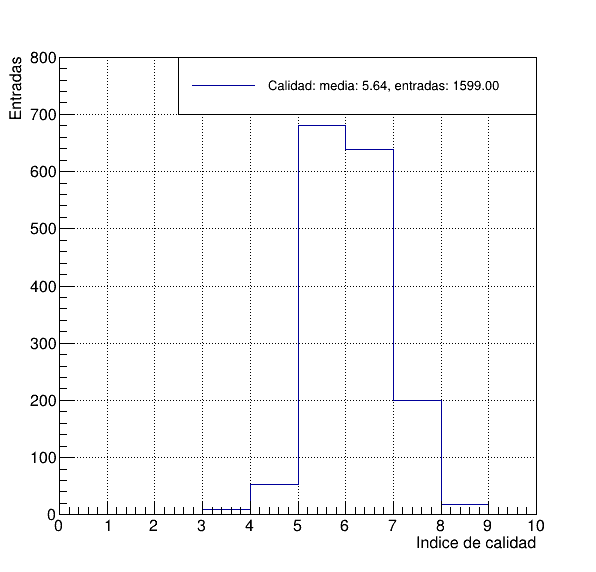

In [146]:
T_target = TH1F("Calidad","",10, 0, 10)
cal = wine['quality'].values

for a in cal:
   T_target.Fill(a)

T_target.SetStats(0)
mean_uno = T_target.GetMean()
entries_uno = T_target.GetEntries()

T_target.SetMaximum(800)
T_target.GetYaxis().SetLabelSize(0.03)
T_target.GetYaxis().SetTitleSize(0.03)
T_target.GetXaxis().SetLabelSize(0.03)
T_target.GetXaxis().SetTitleSize(0.03)
c = TCanvas("T","canvas", 600 , 600)
T_target.Draw("")

legend = ROOT.TLegend(0.3, 0.8, 0.9, 0.9)
legend.SetTextSize(0.025)
legend.AddEntry(T_target, f"Calidad: media: {mean_uno:.2f}, entradas: {entries_uno:.2f}", "l")
legend.Draw()

T_target.SetTitle(";Indice de calidad; Entradas")
c.Draw()
c.SetGrid()
#c.SaveAs('target_dist.png')

Si tomamos cada grado de calidad como una clase, entonces el problema tendrá aproximadamente 8 clases. Las variables son entonces:

In [147]:
wine_data = wine.drop(['quality'],axis=1)
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

Veamos la correlación entre estas:

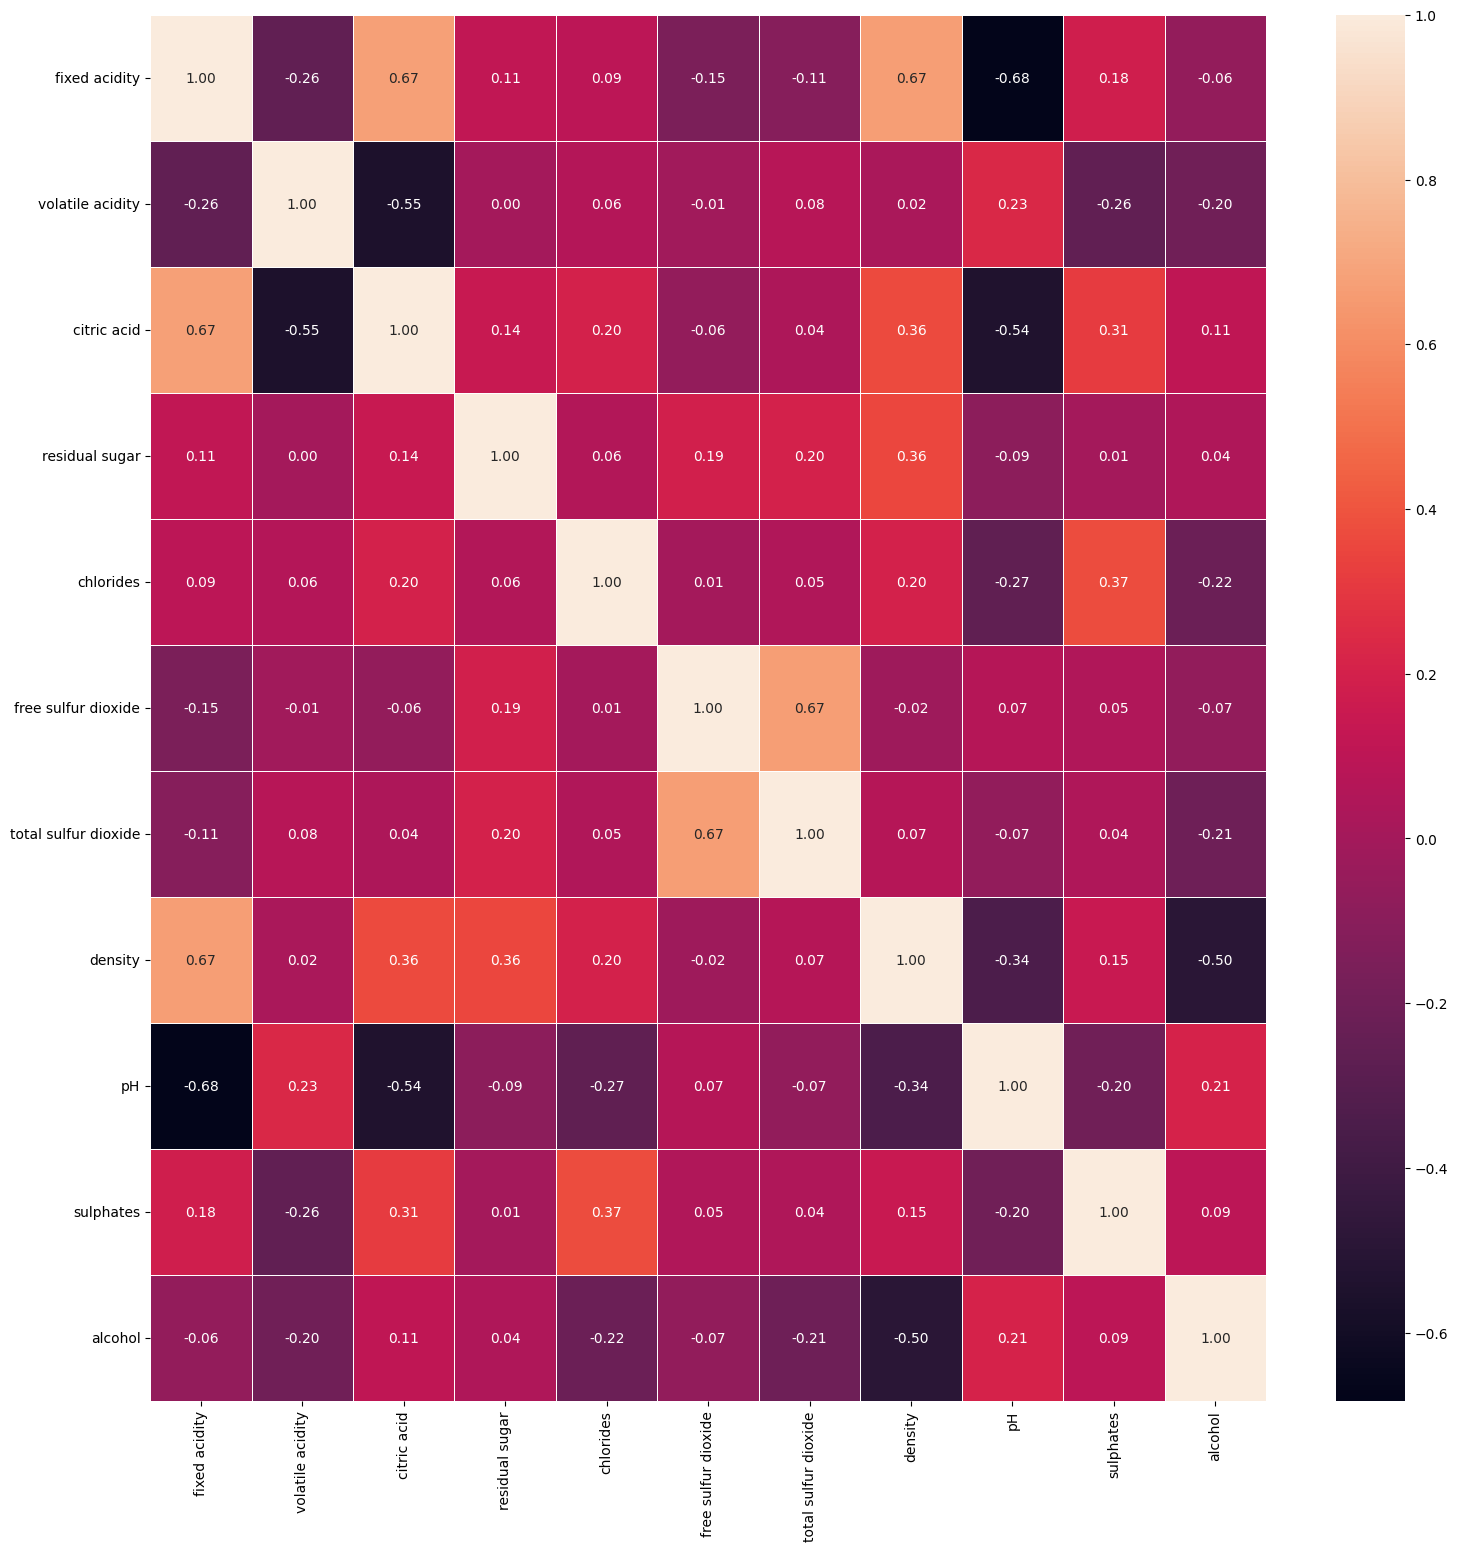

In [148]:
correlation_matrix_wine_p = wine_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_wine_p , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

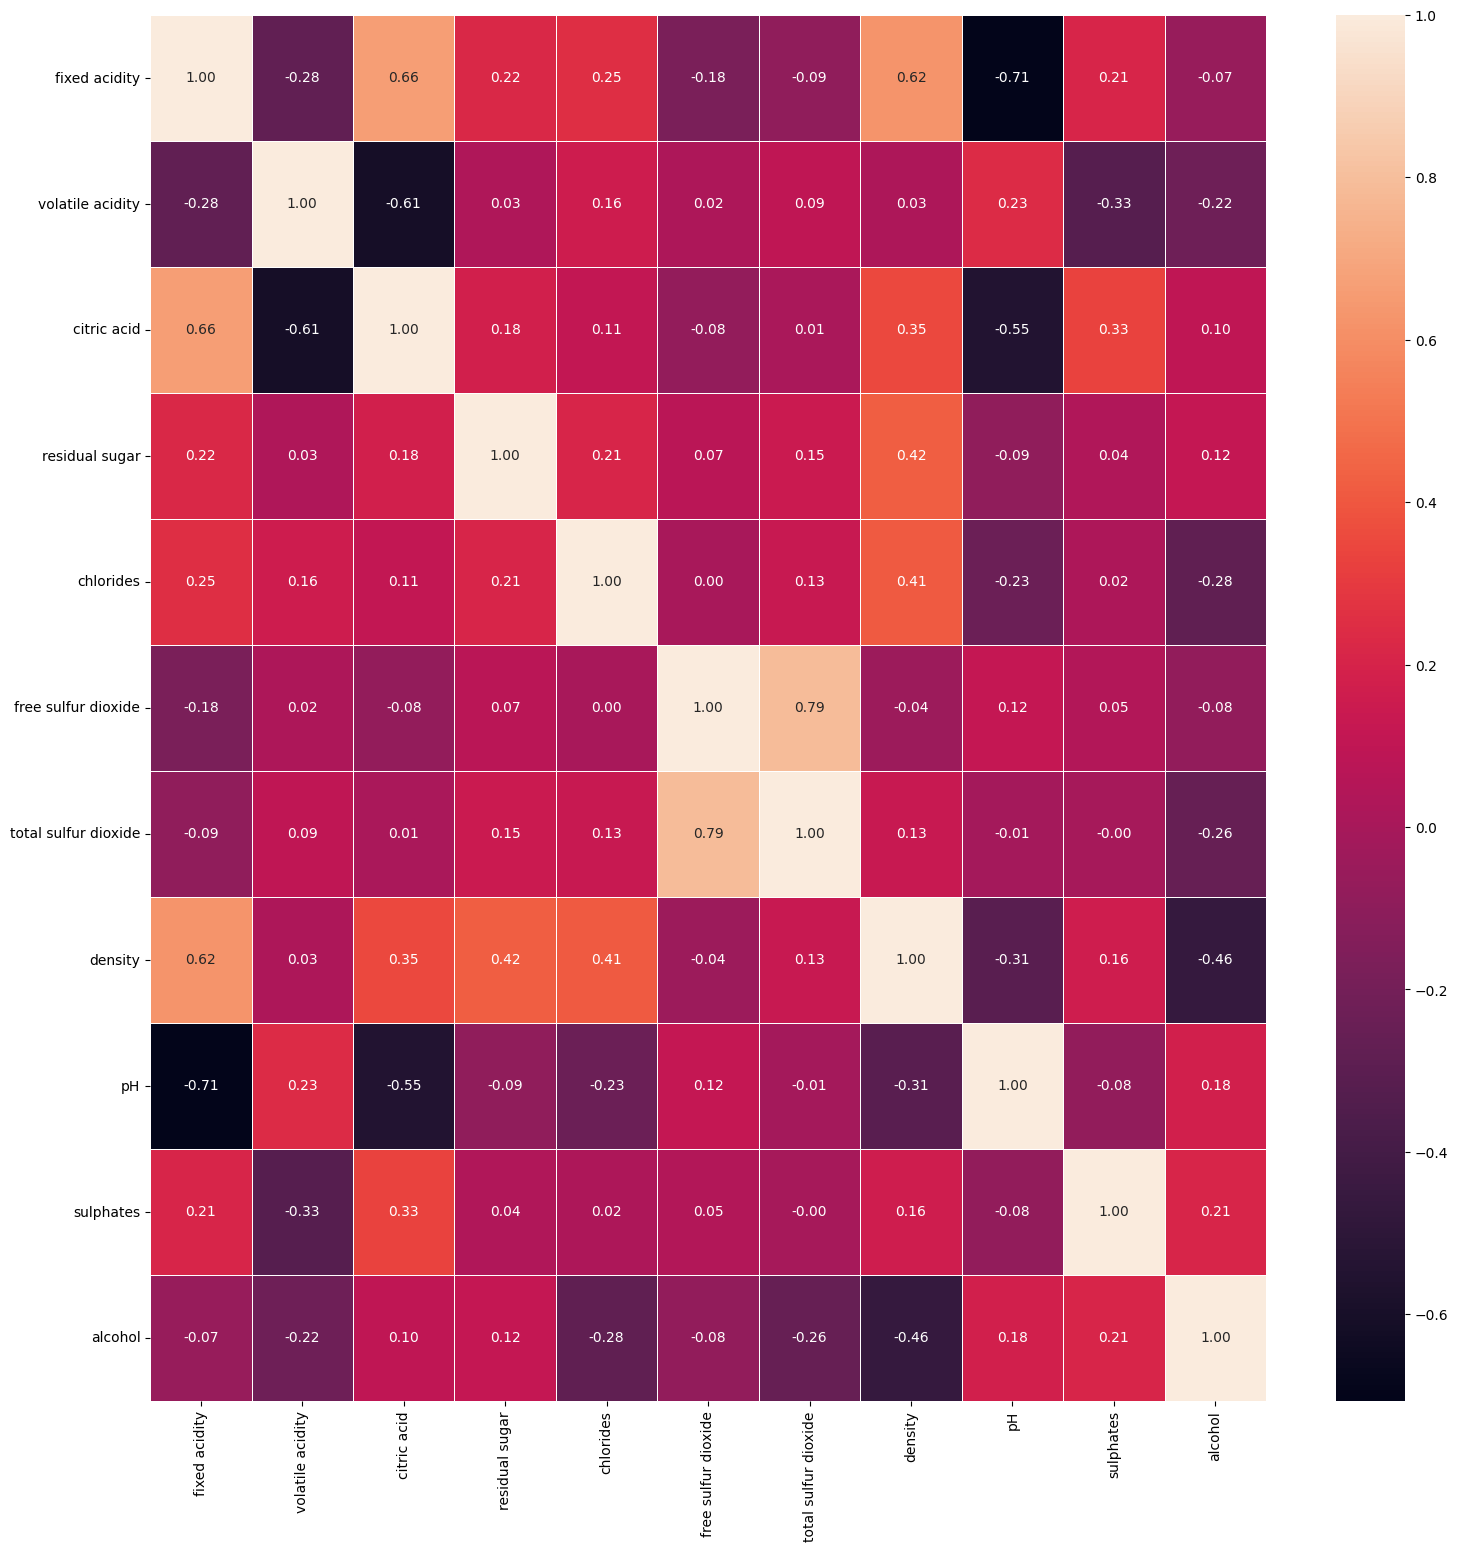

In [149]:
correlation_matrix_wine_s = wine_data.corr(method ='spearman')
fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_wine_s , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

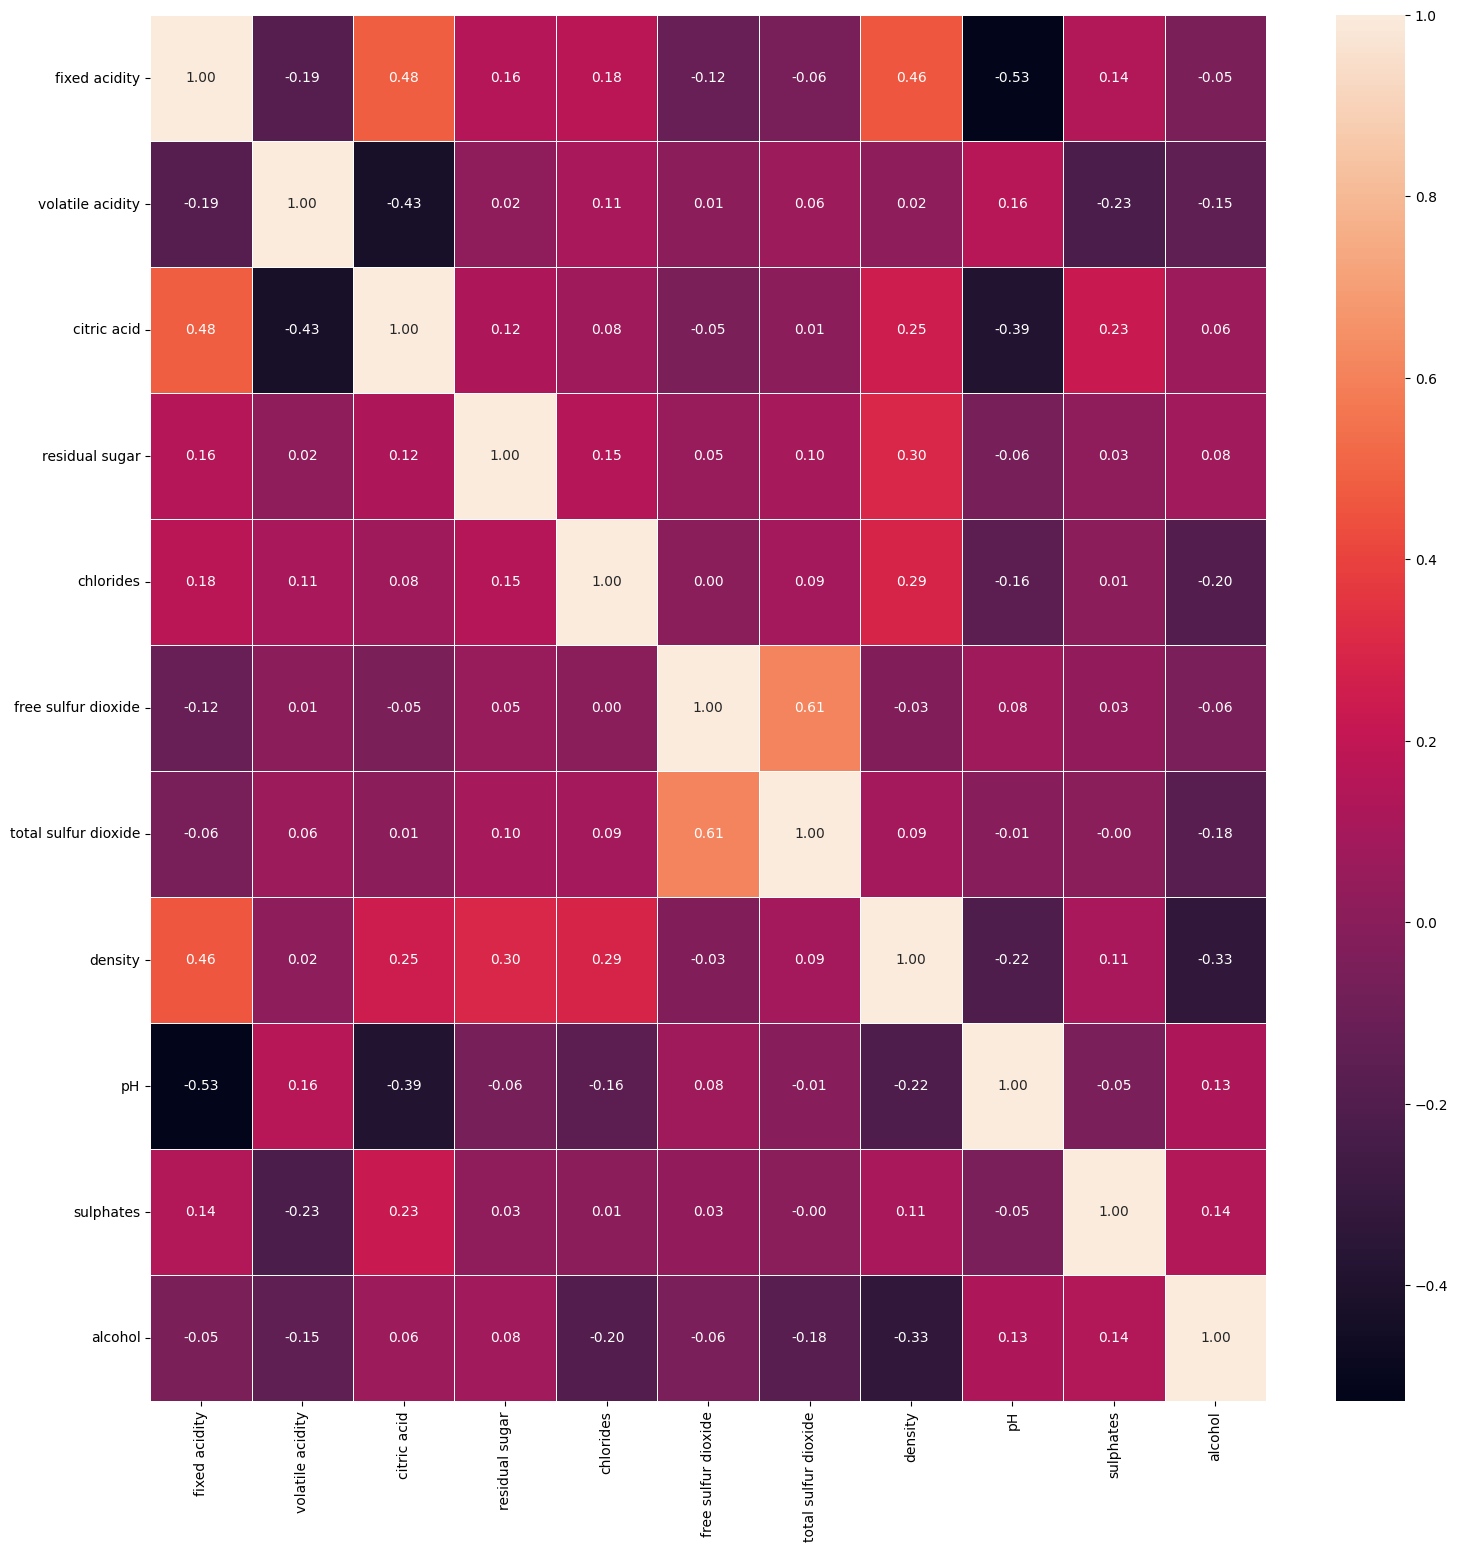

In [150]:
correlation_matrix_wine_k = wine_data.corr(method = 'kendall')

fig, ax = plt.subplots(figsize=(18 ,18 ))
sns.heatmap(correlation_matrix_wine_k , annot = True,  linewidths=.5, ax=ax, fmt=".2f")
plt.show()

Veamos la distribución de las variables:

<ipython-input-151-7bb785d3e15e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[columns[k]], ax = ax1[i][j], color = 'red')
<ipython-input-151-7bb785d3e15e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[columns[k]], ax = ax1[i][j], color = 'red')
<ipython-input-151-7bb785d3e15e>:7

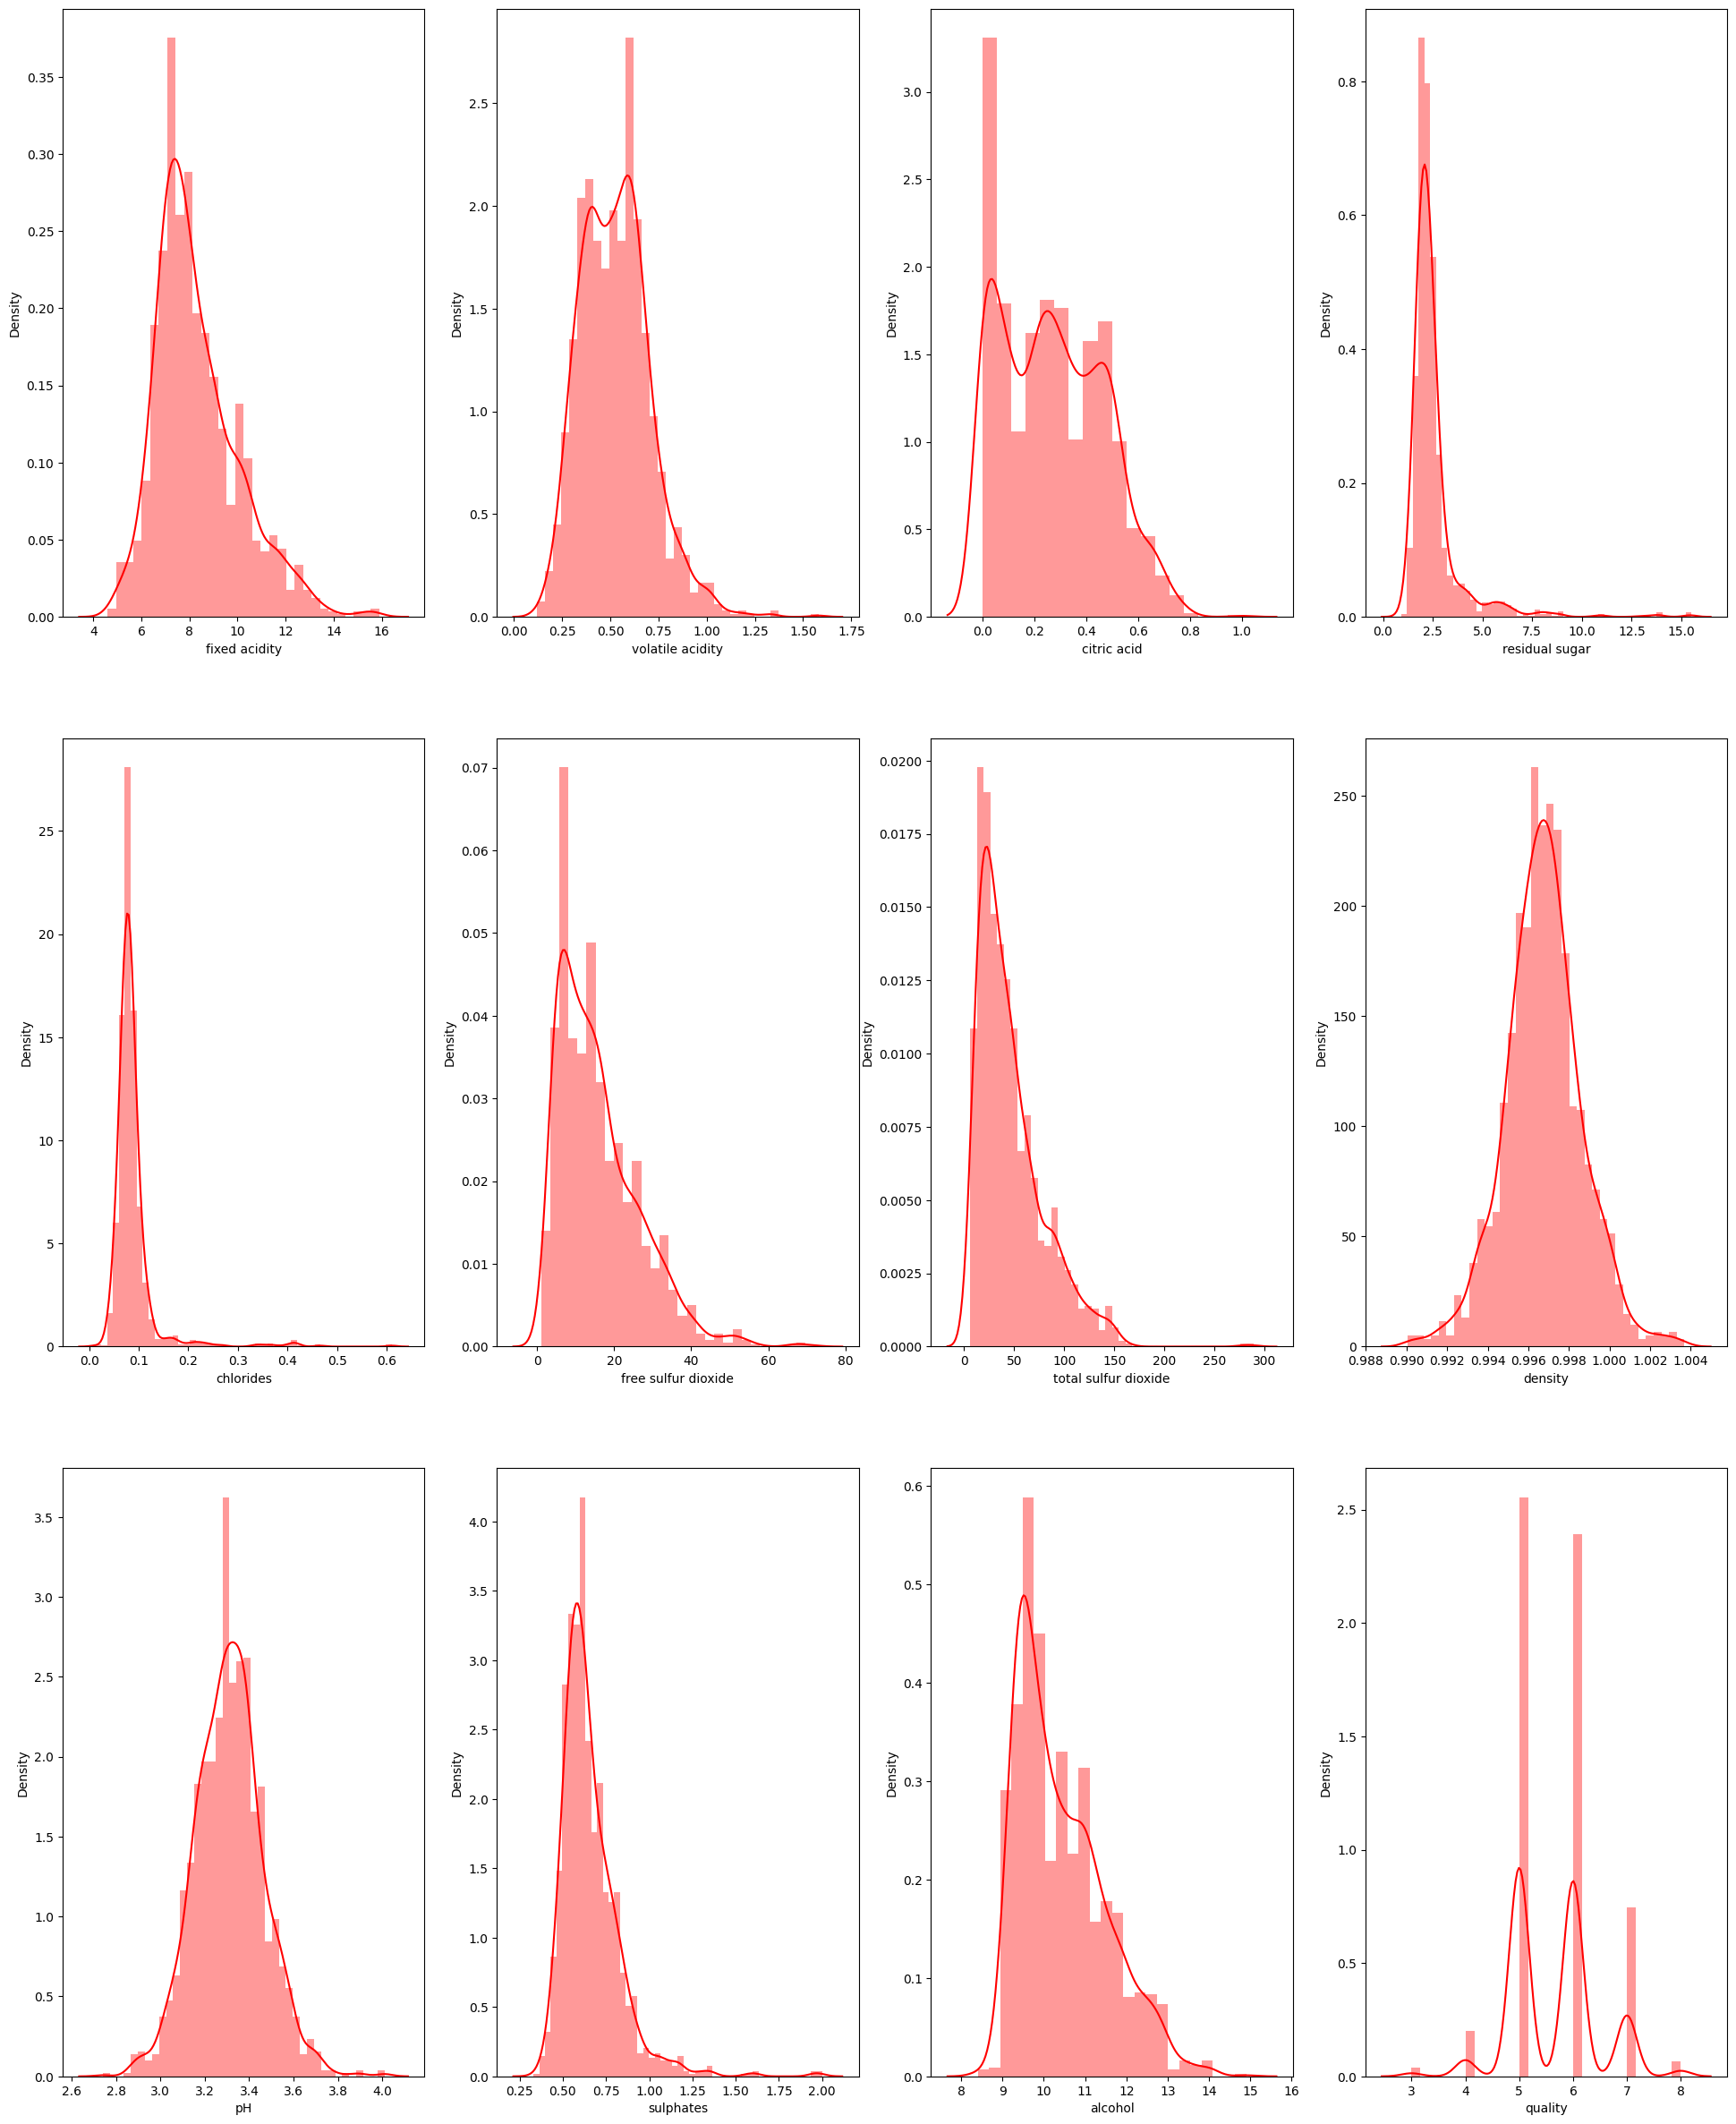

In [151]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(wine.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(wine[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

Separemos el conjunto de datos de prueba y entrenamiento:

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data, cal  , test_size=0.3,random_state=13)

Probemos primero el método de potenciador de gradiente:

In [153]:
GB_wine = GradientBoostingClassifier (n_estimators=100, random_state=30  ,max_depth=10  )

In [154]:
start = time.time()
GB_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 11.274240016937256s


In [155]:
GB_wine.score(X_test, Y_test)

0.65

Una máquina de vector soporte (SVC):

In [156]:
svc_wine = SVC()

In [157]:
start = time.time()
svc_wine.fit(X_train, Y_train)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 0.09759402275085449s


In [158]:
svc_wine.score(X_test, Y_test)

0.5166666666666667

Y finalmente un bosque aleatorio:

In [159]:
rf_wine = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0 ,  oob_score=True  )

In [160]:
start = time.time()
rf_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 7.724866151809692s


In [161]:
rf_wine.score(X_test, Y_test)

0.6708333333333333

Con estos malos resultados, cortaremos o dividiremos la variable objetivo, solo usaremos las clases que tienen más datos, las cuales corresponden a las calidades de vino 5, 6 y 7 (conviertiendo el problema de clasificación a tres clases solamente, para muestra del ejercicio).

Seleccionamos dichas clases con sus variables:

In [162]:
#w_4 = wine[wine.quality==4]
w_5 = wine[wine.quality==5]
w_6 = wine[wine.quality==6]
w_7 = wine[wine.quality==7]
#w_8 = wine[wine.quality==8]

Creamos el nuevo conjunto de datos:

In [163]:
wine_mod = pd.concat([  w_5 , w_6, w_7 ]).reset_index(drop=True)
wine_mod.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3            7.4              0.70         0.00             1.9      0.076   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 11.0                  34.0   0.9978  3.51       0.56   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.4        5  
4      9.4        5

In [164]:
wine_X = wine_mod.drop(['quality'],axis=1)
wine_Y = wine_mod['quality'].values

Dividimos en nuevo conjunto de datos:

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split( wine_X , wine_Y , test_size=0.3,random_state=13)

Probamos de nuevo con el potenciador de gradiente:

In [166]:
start = time.time()
GB_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 7.333716154098511s


In [167]:
pred_gb_wine = GB_wine.predict(X_test)
pred_gb_wine

array([5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6, 7, 5, 5, 7, 6, 5, 5, 6, 6,
       6, 5, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 5, 5, 6, 5, 7, 7,
       6, 5, 5, 5, 6, 5, 6, 6, 6, 7, 5, 5, 7, 5, 7, 6, 6, 5, 6, 5, 7, 7,
       6, 5, 5, 5, 5, 7, 6, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5,
       6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5,
       7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 7, 5, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       7, 7, 6, 5, 6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 7, 7, 6, 6, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5,

In [ ]:
# salvar el modelo
#pickle.dump(GB_wine, open("gb_wine.pickle.dat", "wb"))

In [168]:
imp_wine = GB_wine.feature_importances_.argsort()
print("Importancia de las características:")
print(imp_wine)

Importancia de las características:
[ 5  2  7  3  0  4  8  6  1  9 10]


In [169]:
GB_wine.score(X_test, Y_test)

0.7236842105263158

Calculando la matriz de confusión:

In [170]:
conf_mat_gb_wine = confusion_matrix(Y_test, pred_gb_wine)
print(  conf_mat_gb_wine  )

[[157  38   2]
 [ 45 145  17]
 [  5  19  28]]


F1-score (valor-F) = 68.39769143988565 | Accuracy (exactitud) = 72.36842105263158


<Axes: >

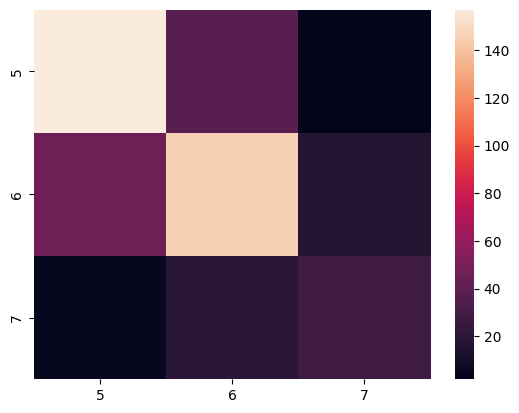

In [171]:
df_gb_wine = pd.DataFrame(conf_mat_gb_wine, index=wine_mod['quality'].unique(), columns= wine_mod['quality'].unique())

print('F1-score (valor-F) =', f1_score(Y_test, pred_gb_wine , average='macro')*100, '|', 'Accuracy (exactitud) =', accuracy_score(Y_test, pred_gb_wine)*100)
sns.heatmap(df_gb_wine)

Calculamos la curva ROC:

In [172]:
label_binarizer_wine = LabelBinarizer().fit(Y_train)
y_t_w = label_binarizer_wine.transform(Y_test)
y_t_w.shape

(456, 3)

In [173]:
print(y_t_w)

[[1 0 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 1 0]]


La clase objetivo será el valor de calidad 5:

In [174]:
clase = 5
clase_id = np.flatnonzero(label_binarizer_wine.classes_ == clase)[0]
clase_id

0

In [175]:
y_gb_wine = label_binarizer_wine.transform( pred_gb_wine )
y_gb_wine.shape

(456, 3)

In [176]:
pred_gb_wine_pro = GB_wine.predict_proba(X_test)
pred_gb_wine_pro

array([[9.99638567e-01, 3.44416951e-04, 1.70162788e-05],
       [5.17363635e-04, 9.99479660e-01, 2.97620560e-06],
       [3.76111981e-01, 4.48044434e-01, 1.75843586e-01],
       ...,
       [9.99820285e-01, 1.74266330e-04, 5.44895263e-06],
       [9.38145674e-01, 6.16152634e-02, 2.39062746e-04],
       [4.37531043e-01, 5.62101078e-01, 3.67878441e-04]])

Text(0.5, 1.0, 'Curva ROC')

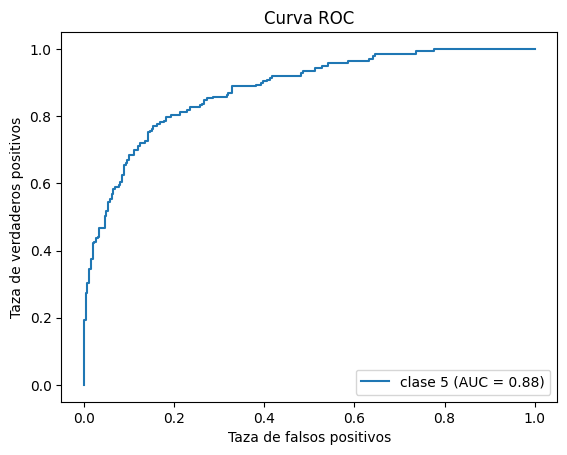

In [177]:
fpr, tpr, thresholds = metrics.roc_curve( y_t_w[:, clase_id] ,  pred_gb_wine_pro[:, clase_id] )
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=f"clase {clase}")
display.plot()

plt.xlabel("Taza de falsos positivos")
plt.ylabel("Taza de verdaderos positivos")
plt.title("Curva ROC")

Ahora, se mostrará una proyección del hiperplano de la superficie de decisión en 2D usando las dos características más importantes:

In [178]:
X_2D_train = X_train[['alcohol','sulphates']]
X_2D_test  = X_test[['alcohol','sulphates']]

Para ello, se re-entrena el método con sólo estas dos características:

In [179]:
GB_wine_proy = GradientBoostingClassifier (n_estimators=100, random_state=30  ,max_depth=10  )
GB_wine_proy.fit( X_2D_train , Y_train )

GradientBoostingClassifier(max_depth=10, random_state=30)

  La proyección muestra en que espacio el método de clasificación actúa según cada clase involucrada. Cuando la clasificación es adecuada, cada dato de entrada de la variable objetivo se dispone sobre la superficie de la clase a la que pertenece.

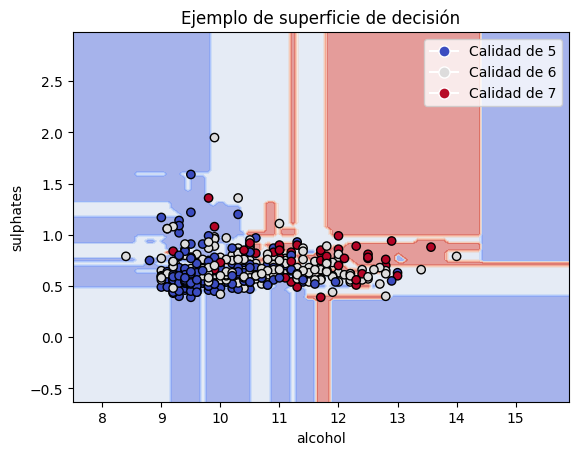

In [180]:
disp = DecisionBoundaryDisplay.from_estimator( GB_wine_proy,
                                              X_2D_train,  response_method="predict",
                                              xlabel='alcohol',ylabel='sulphates', alpha=0.5, cmap=plt.cm.coolwarm)


disp.ax_.scatter(  X_2D_test['alcohol'] ,  X_2D_test['sulphates'] ,
                 c = Y_test ,  edgecolor="k",
                 cmap=plt.cm.coolwarm)

cmap=plt.cm.coolwarm
color0 = cmap(0)
color1 = cmap(0.5)
color2 = cmap(0.99)

clase0 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 5', markerfacecolor=color0, markersize=8)
clase1 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 6', markerfacecolor=color1, markersize=8)
clase2 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 7', markerfacecolor=color2, markersize=8)

plt.title(f"Ejemplo de superficie de decisión")
plt.legend(handles=[clase0, clase1, clase2])
plt.show()


Ahora, usemos el Bosque aleatorio y repitamos el experimento:

In [181]:
rf_wine = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0 ,  oob_score=True  )
start = time.time()
rf_wine.fit(X_train , Y_train )
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 7.229379892349243s


In [182]:
rf_wine.score(X_test, Y_test)

0.7521929824561403

In [183]:
pred_forest_wine = rf_wine.predict(X_test)

In [184]:
importances_rf= rf_wine.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_wine.estimators_], axis=0)

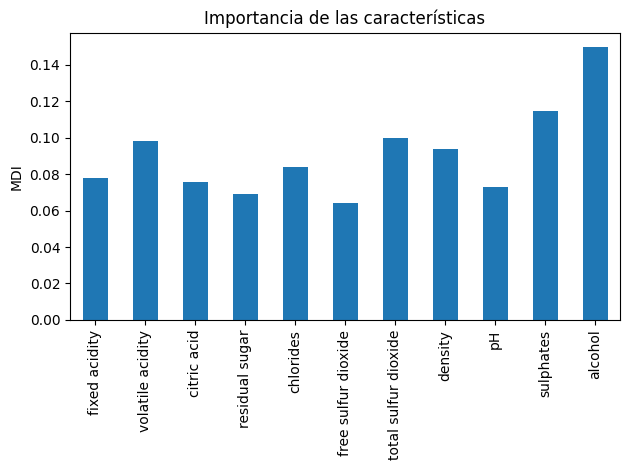

In [185]:
forest_importances_wine = pd.Series(importances_rf, index =  wine_X.columns )
fig, ax = plt.subplots()
forest_importances_wine.plot.bar(ax=ax)
ax.set_title("Importancia de las características")
ax.set_ylabel("MDI")
fig.tight_layout()

In [186]:
imp_forest_wine = rf_wine.feature_importances_.argsort()
print("Características principales (de derecha a izquierda en importancia):")
print(imp_forest_wine)

Características principales (de derecha a izquierda en importancia):
[ 5  3  8  2  0  4  7  1  6  9 10]


In [187]:
oob_w = rf_wine.oob_score_
print("error oob:")
print(oob_w)

error oob:
0.6949152542372882


In [ ]:
#pickle.dump(rf_model_tres, open("rf_tres.pickle.dat", "wb"))

Se muestra un árbol de decisión:

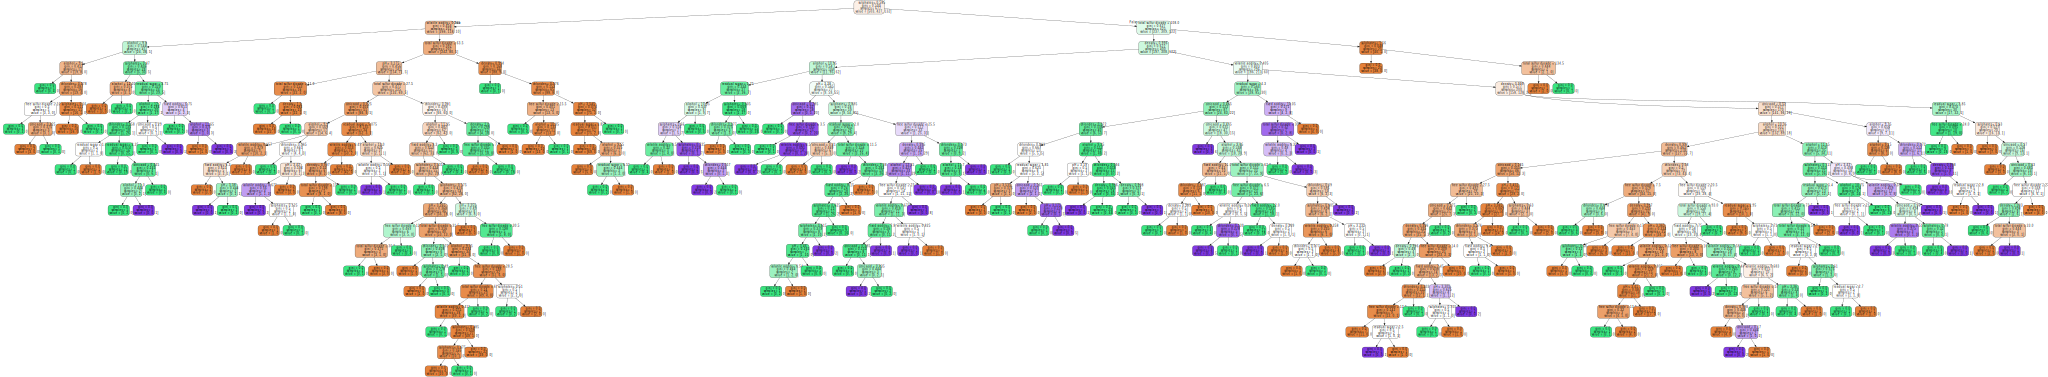

In [188]:
swin = tree.export_graphviz(rf_wine.estimators_[2] , out_file=None, feature_names=wine_X.columns, filled=True, rounded=True, special_characters=True)
graph_wine = graphviz.Source(swin)
graph_wine

Se construye la matriz de confusión:

In [189]:
conf_mat_forest_wine = confusion_matrix( Y_test , pred_forest_wine )
print(  conf_mat_forest_wine  )

[[163  34   0]
 [ 47 154   6]
 [  2  24  26]]


F1-score (valor-F) = 71.70657219790387 | Accuracy (precisión) = 75.21929824561403


<Axes: >

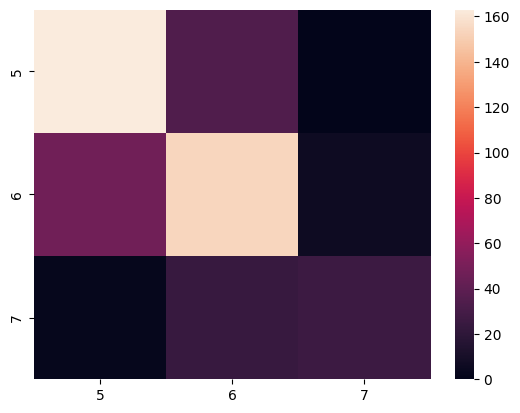

In [190]:
df_forest_wine = pd.DataFrame(conf_mat_forest_wine , index=wine_mod['quality'].unique(), columns= wine_mod['quality'].unique())
print('F1-score (valor-F) =', f1_score( Y_test , pred_forest_wine, average='macro')*100, '|', 'Accuracy (precisión) =', accuracy_score(Y_test , pred_forest_wine)*100)
sns.heatmap(df_forest_wine)

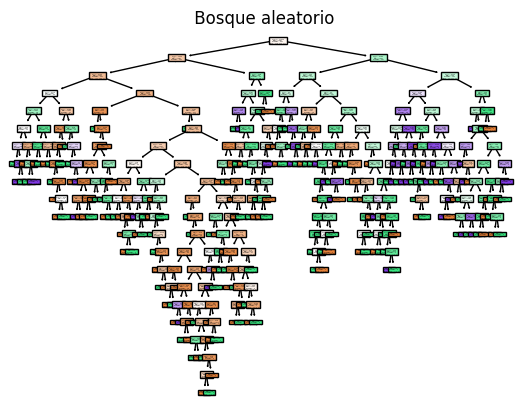

In [191]:
plt.figure()
plot_tree( rf_wine.estimators_[1] , filled=True)
plt.title(" Bosque aleatorio")
plt.show()

Se construye la curva ROC de la calidad de valor 5:

In [192]:
y_rf = label_binarizer_wine.transform(  pred_forest_wine )
y_rf.shape

(456, 3)

In [193]:
y_t_w.shape

(456, 3)

In [194]:
y_t_w[:, clase_id]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [195]:
clase_id

0

In [197]:
pred_rf_wine_pro = rf_wine.predict_proba(X_test)
pred_rf_wine_pro

array([[0.832, 0.158, 0.01 ],
       [0.268, 0.73 , 0.002],
       [0.389, 0.491, 0.12 ],
       ...,
       [0.778, 0.214, 0.008],
       [0.331, 0.538, 0.131],
       [0.522, 0.433, 0.045]])

In [198]:
fpr, tpr, thresholds = metrics.roc_curve( y_t_w[:, clase_id] ,  pred_rf_wine_pro[:, clase_id] )
#fpr

In [ ]:
#thresholds

Text(0.5, 1.0, 'Curva ROC')

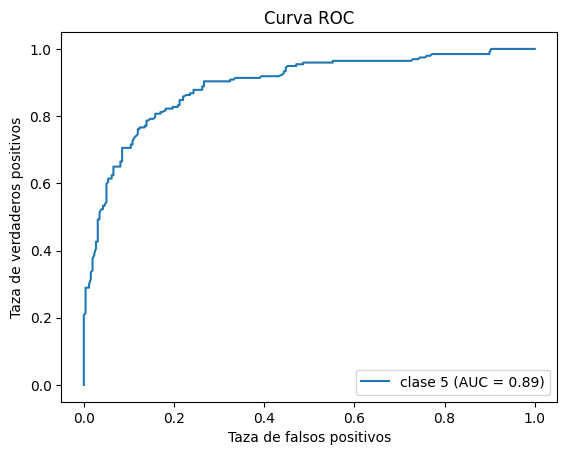

In [199]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                     estimator_name=f"clase {clase}")

display.plot()

plt.xlabel("Taza de falsos positivos")
plt.ylabel("Taza de verdaderos positivos")
plt.title("Curva ROC")

Al igual que el método de potenciador del gradiente, se construye la proyección 2D del bosque aleatorio con las dos características más importantes en la clasificación:

In [200]:
rf_wine_proy = RandomForestClassifier(max_depth=100, n_estimators = 1000, random_state=0 ,  oob_score=True  )
rf_wine_proy.fit( X_2D_train , Y_train )

RandomForestClassifier(max_depth=100, n_estimators=1000, oob_score=True,
                       random_state=0)

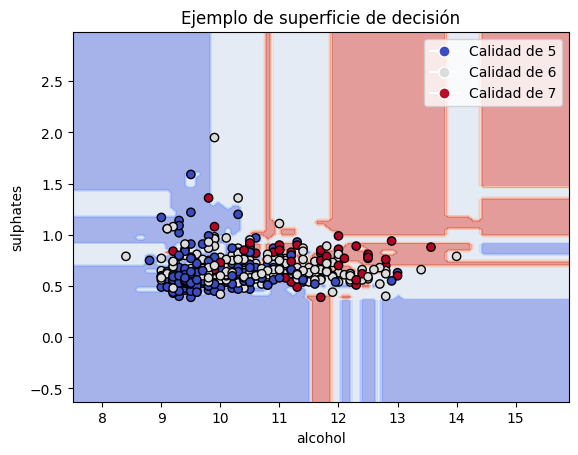

In [201]:
disp = DecisionBoundaryDisplay.from_estimator( rf_wine_proy,
                                              X_2D_train,  response_method="predict",
                                              xlabel='alcohol',ylabel='sulphates', alpha=0.5, cmap=plt.cm.coolwarm)

scat = disp.ax_.scatter(  X_2D_test['alcohol'] ,  X_2D_test['sulphates'] ,
                 c = Y_test ,  edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title(f"Ejemplo de superficie de decisión")

cmap=plt.cm.coolwarm
color0 = cmap(0)
color1 = cmap(0.5)
color2 = cmap(0.99)

clase0 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 5', markerfacecolor=color0, markersize=8)
clase1 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 6', markerfacecolor=color1, markersize=8)
clase2 = plt.Line2D([0], [0], marker='o', color='w', label='Calidad de 7', markerfacecolor=color2, markersize=8)

plt.legend(handles=[clase0, clase1, clase2])
plt.show()

Ahora, ¿Por qué no intentar mejorar la predicción de calidad del conjunto de datos del vino rojo, usando toda la distribución de calidad?

Notas importantes:

-En ML, los datos suelen ser muchísimo más pesados, y cada una de las técnicas vistas adquiere dificultades adicionales.

-El balanceo de datos y transformaciones lineales son técnicas que ayudan a mejorar el desempeño en general de métodos de inferencia.

-A veces, construir clasificadores para varias regiones de la distribución total, que luego se ensamblen y que provengan de diferentes técnicas puede ayudar a mejorar resutados.

-El aumento de datos por varias técnicas estadísticas para clases con pocos datos es una técnica habitual.

-Modelos basados como bagging y boosting son buenas herramientas en machine learning.

## Referencias:

Este notebook se base en:

https://www.kaggle.com/code/naga26/disease-type-prediction-using-symptoms/notebook

https://www.analyticsvidhya.com/blog/2020/12/out-of-bag-oob-score-in-the-random-forest-algorithm/

https://www.kaggle.com/code/nikunjmalpani/wine-quality-prediction-imbalanced-data

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://stackabuse.com/bytes/plot-decision-boundaries-using-python-and-scikit-learn/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

https://cienciadedatos.net/documentos/py24-svm-python

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://www.kaggle.com/docs/datasets

https://scikit-learn.org/stable/modules/model_evaluation.html

https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8#:~:text=Gini%20Index%2C%20also%20known%20as,it%20can%20be%20called%20pure.

https://datatofish.com/check-nan-pandas-dataframe/

https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

https://www.kaggle.com/code/hashemialii/random-forest-regression-algorithm

https://www.questionpro.com/blog/es/coeficiente-de-correlacion-de-spearman/

https://datatab.es/tutorial/spearman-correlation

https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

https://datascience.eu/machine-learning/gradient-boosting-what-you-need-to-know/

https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

Lecturas propuestas:

-Why do tree-based models still outperform deep
learning on tabular data?

-Aplicación de algoritmos Random Forest y XGBoost en una base de solicitudes de tarjetas de crédito.

-Hot Spots & Hot Regions Detection Using Classification Algorithms in BMPs Complexes at the Protein-Protein Interface with the Ground-State Energy Feature.

-Uso de curvas ROC en investigación clínica. Aspectos teórico-prácticos.

